## Imporing Librabies


In [75]:
import warnings
warnings.filterwarnings('ignore')

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option("display.max_columns",None)

## Read application CSV

In [77]:
app_data = pd.read_csv("application_data.csv")
app_data.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [78]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


## Data quality check

### Check for percentage null values in application dataset

In [79]:
pd.set_option('display.max_rows',200)
app_data.isnull().mean()*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

- Conclusion columns with null values more than 47% may give wrong insights.hence will drop them

#### Dropping columns with missing values greater than 47%

In [80]:
percentage = 47
threshold = int(((100-percentage)/100)*app_data.shape[0]+1)
app_df = app_data.dropna(axis = 1,thresh=threshold)
app_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
app_df.shape

(307511, 73)

In [82]:
app_df.isnull().mean()*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

### Input missing values

#### Check the missing values in application dataset before imputing

In [83]:
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

### OCCUPATION_TYPE column has 31% missing values,since its a categorical column, imputing the missing values with a unknown or other value

In [84]:
app_df.OCCUPATION_TYPE.isnull().mean()*100

np.float64(31.345545362604916)

In [85]:
app_df.OCCUPATION_TYPE.value_counts(normalize=True)*100

OCCUPATION_TYPE
Laborers                 26.139636
Sales staff              15.205570
Core staff               13.058924
Managers                 10.122679
Drivers                   8.811576
High skill tech staff     5.390299
Accountants               4.648067
Medicine staff            4.043672
Security staff            3.183498
Cooking staff             2.816408
Cleaning staff            2.203960
Private service staff     1.256158
Low-skill Laborers        0.991379
Waiters/barmen staff      0.638499
Secretaries               0.618132
Realty agents             0.355722
HR staff                  0.266673
IT staff                  0.249147
Name: proportion, dtype: float64

In [86]:
app_df.OCCUPATION_TYPE.fillna("Others",inplace=True)

In [87]:
app_df.OCCUPATION_TYPE.isnull().mean()*100

np.float64(0.0)

In [88]:
app_df.OCCUPATION_TYPE.value_counts(normalize=True)*100

OCCUPATION_TYPE
Others                   31.345545
Laborers                 17.946025
Sales staff              10.439301
Core staff                8.965533
Managers                  6.949670
Drivers                   6.049540
High skill tech staff     3.700681
Accountants               3.191105
Medicine staff            2.776161
Security staff            2.185613
Cooking staff             1.933589
Cleaning staff            1.513117
Private service staff     0.862408
Low-skill Laborers        0.680626
Waiters/barmen staff      0.438358
Secretaries               0.424375
Realty agents             0.244219
HR staff                  0.183083
IT staff                  0.171051
Name: proportion, dtype: float64

#### EXT_SOURCE_3 Column has missing values

In [89]:
app_df.EXT_SOURCE_3.isnull().mean()*100

np.float64(19.825307062186393)

In [90]:
app_df.EXT_SOURCE_3.value_counts(normalize=True)*100

EXT_SOURCE_3
0.746300    0.592182
0.713631    0.533369
0.694093    0.517550
0.670652    0.483074
0.652897    0.468067
              ...   
0.028275    0.000406
0.858178    0.000406
0.849170    0.000406
0.887664    0.000406
0.864212    0.000406
Name: proportion, Length: 814, dtype: float64

In [91]:
app_df.EXT_SOURCE_3.describe()

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

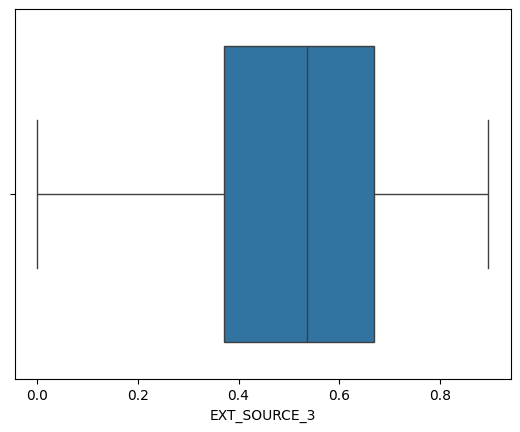

In [92]:
sns.boxplot(x=app_df.EXT_SOURCE_3)
plt.show()

In [93]:
app_df.EXT_SOURCE_3.fillna(app_df.EXT_SOURCE_3.median(),inplace=True)

In [94]:
app_df.EXT_SOURCE_3.isnull().mean()*100


np.float64(0.0)

In [95]:
app_df.EXT_SOURCE_3.value_counts(normalize=True)*100

EXT_SOURCE_3
0.535276    20.080908
0.746300     0.474780
0.713631     0.427627
0.694093     0.414945
0.670652     0.387303
              ...    
0.028275     0.000325
0.858178     0.000325
0.849170     0.000325
0.887664     0.000325
0.864212     0.000325
Name: proportion, Length: 814, dtype: float64

In [96]:
null_cols = list(app_df.isnull().any())
len(null_cols)

73

In [97]:
app_df.isnull().mean()*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

### Handling missing values in columns with 13% null values

In [98]:
app_df.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts(normalize=True)*100


AMT_REQ_CREDIT_BUREAU_HOUR
0.0    99.388703
1.0     0.586484
2.0     0.021053
3.0     0.003384
4.0     0.000376
Name: proportion, dtype: float64

In [99]:
app_df.AMT_REQ_CREDIT_BUREAU_DAY.value_counts(normalize=True)*100


AMT_REQ_CREDIT_BUREAU_DAY
0.0    99.440209
1.0     0.485729
2.0     0.039851
3.0     0.016918
4.0     0.009775
5.0     0.003384
6.0     0.003008
9.0     0.000752
8.0     0.000376
Name: proportion, dtype: float64

- Conclusion: We could see that 99% of values in the columns AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_QRT, AMT_REQ_CREDIT_BUREAU_YEAR is 0.0 . Hence input there columns with the mode

In [100]:
cols = ["AMT_REQ_CREDIT_BUREAU_HOUR","AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_YEAR"]

In [101]:
for col in cols:
    app_df[col].fillna(app_df[col].mode()[0],inplace=True)

In [102]:
app_df.isnull().mean()*100


SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
NAME_TYPE_SUITE                0.420148
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000
FLAG_CONT_MOBILE               0.000000


### Handling missing values less than 1%

In [103]:
null_cols = list(app_df.columns[app_df.isna().any()])
len(null_cols)

10

In [104]:
app_df.NAME_TYPE_SUITE.value_counts(normalize=True)*100

NAME_TYPE_SUITE
Unaccompanied      81.159562
Family             13.111205
Spouse, partner     3.713029
Children            1.066884
Other_B             0.578018
Other_A             0.282804
Group of people     0.088499
Name: proportion, dtype: float64

In [105]:
app_df.EXT_SOURCE_2.value_counts(normalize=True)*100


EXT_SOURCE_2
0.285898    0.234967
0.262258    0.135897
0.265256    0.111781
0.159679    0.104937
0.265312    0.099723
              ...   
0.353855    0.000326
0.200589    0.000326
0.146779    0.000326
0.288490    0.000326
0.269471    0.000326
Name: proportion, Length: 119831, dtype: float64

In [106]:
app_df.OBS_30_CNT_SOCIAL_CIRCLE.value_counts(normalize=True)*100

OBS_30_CNT_SOCIAL_CIRCLE
0.0      53.479722
1.0      15.916669
2.0       9.725603
3.0       6.630559
4.0       4.614506
5.0       3.116904
6.0       2.105452
7.0       1.432347
8.0       0.968058
9.0       0.653529
10.0      0.448954
11.0      0.277986
12.0      0.212731
13.0      0.134099
14.0      0.084179
15.0      0.054162
16.0      0.043395
17.0      0.028712
18.0      0.015009
19.0      0.014356
20.0      0.009788
21.0      0.009462
22.0      0.007178
23.0      0.004894
25.0      0.003589
24.0      0.003589
27.0      0.001631
26.0      0.000979
30.0      0.000653
29.0      0.000326
28.0      0.000326
47.0      0.000326
348.0     0.000326
Name: proportion, dtype: float64

- Conclusion :
          - For categorical columns,impute the missing values with mode
          - For numerical columns,imputing missing values with median

In [107]:
app_df["NAME_TYPE_SUITE"].fillna(app_df["NAME_TYPE_SUITE"].mode()[0],inplace=True)


In [108]:
app_df.CNT_FAM_MEMBERS.fillna(app_df.NAME_TYPE_SUITE.mode()[0],inplace=True)


In [109]:
# Imputing Numerical Colummns
app_df.EXT_SOURCE_2.fillna(app_df.EXT_SOURCE_2.median(), inplace=True) 
app_df.AMT_GOODS_PRICE.fillna(app_df.AMT_GOODS_PRICE.median(), inplace=True) 
app_df.AMT_ANNUITY.fillna(app_df.AMT_ANNUITY.median(), inplace=True) 
app_df.DEF_60_CNT_SOCIAL_CIRCLE.fillna(app_df.DEF_60_CNT_SOCIAL_CIRCLE.median(), inplace=True) 
app_df.DEF_30_CNT_SOCIAL_CIRCLE.fillna(app_df.DEF_30_CNT_SOCIAL_CIRCLE.median(), inplace=True) 
app_df.OBS_30_CNT_SOCIAL_CIRCLE.fillna(app_df.OBS_30_CNT_SOCIAL_CIRCLE.median(), inplace=True) 
app_df.OBS_60_CNT_SOCIAL_CIRCLE.fillna(app_df.OBS_60_CNT_SOCIAL_CIRCLE.median(), inplace=True)
app_df.DAYS_LAST_PHONE_CHANGE.fillna(app_df.DAYS_LAST_PHONE_CHANGE.median(), inplace=True)

In [110]:
null_cols = list(app_df.columns[app_df.isna().any()])
len(null_cols)


0

In [111]:
app_df.isnull().median()*100

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
FLAG_OWN_REALTY                0.0
CNT_CHILDREN                   0.0
AMT_INCOME_TOTAL               0.0
AMT_CREDIT                     0.0
AMT_ANNUITY                    0.0
AMT_GOODS_PRICE                0.0
NAME_TYPE_SUITE                0.0
NAME_INCOME_TYPE               0.0
NAME_EDUCATION_TYPE            0.0
NAME_FAMILY_STATUS             0.0
NAME_HOUSING_TYPE              0.0
REGION_POPULATION_RELATIVE     0.0
DAYS_BIRTH                     0.0
DAYS_EMPLOYED                  0.0
DAYS_REGISTRATION              0.0
DAYS_ID_PUBLISH                0.0
FLAG_MOBIL                     0.0
FLAG_EMP_PHONE                 0.0
FLAG_WORK_PHONE                0.0
FLAG_CONT_MOBILE               0.0
FLAG_PHONE                     0.0
FLAG_EMAIL                     0.0
OCCUPATION_TYPE                0.0
CNT_FAM_MEMBERS     

### Convert Negative values to positive in days variables so that median is not Aaffected


In [112]:
app_df.DAYS_BIRTH = app_df.DAYS_BIRTH.apply(lambda x: abs(x))
app_df.DAYS_EMPLOYED = app_df.DAYS_EMPLOYED.apply(lambda x: abs(x))
app_df.DAYS_ID_PUBLISH = app_df.DAYS_ID_PUBLISH.apply(lambda x: abs(x))
app_df.DAYS_LAST_PHONE_CHANGE = app_df.DAYS_LAST_PHONE_CHANGE.apply(lambda x: abs(x))
app_df.DAYS_REGISTRATION = app_df.DAYS_REGISTRATION.apply(lambda x: abs(x))

### Binning of continous variables 

#### Standing Days columns in years for easy binning

In [113]:
app_df["YEARS_BIRTH"]= app_df.DAYS_BIRTH.apply(lambda x: int(x//356))
app_df["YEARS_EMPLOYED"]= app_df.DAYS_EMPLOYED.apply(lambda x: int(x//356))
app_df["YEARS_REGISTRATION"]= app_df.DAYS_REGISTRATION.apply(lambda x: int(x//356))
app_df["YEARS_ID_PUBLISH"]= app_df.DAYS_ID_PUBLISH.apply(lambda x: int(x//356))
app_df["YEARS_LAST_PHONE_CHANGE"]= app_df.DAYS_LAST_PHONE_CHANGE.apply(lambda x: int(x//356))

### Binning AMT_CREDIT column

In [114]:
app_df.AMT_CREDIT.value_counts(normalize=True)*100

AMT_CREDIT
450000.0     3.157285
675000.0     2.886726
225000.0     2.654214
180000.0     2.387557
270000.0     2.354713
               ...   
425326.5     0.000325
1247643.0    0.000325
264600.0     0.000325
766444.5     0.000325
1317807.0    0.000325
Name: proportion, Length: 5603, dtype: float64

In [115]:
app_df.AMT_CREDIT.describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [116]:
app_df["AMT_CREDIT_Category"] = pd.cut(app_df.AMT_CREDIT,[0,200000,400000,600000,800000,1000000],
                                        labels = ["Very low Credit","Low Credit","Medium Credit","High Credit","Very high Credit"])

In [117]:
app_df.AMT_CREDIT_Category.value_counts(normalize=True)*100

AMT_CREDIT_Category
Low Credit          31.511770
Medium Credit       25.733324
High Credit         16.791314
Very low Credit     14.035088
Very high Credit    11.928504
Name: proportion, dtype: float64

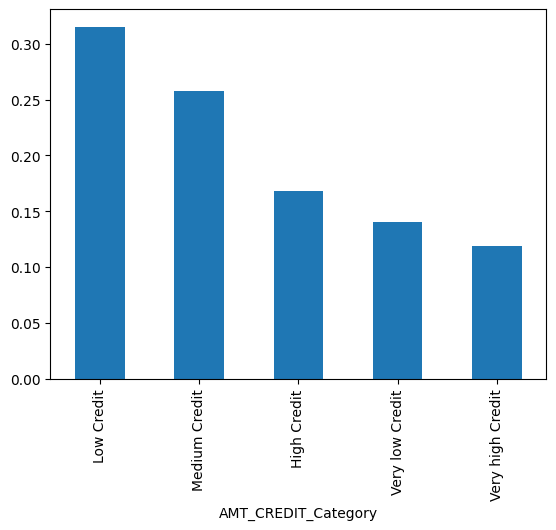

In [118]:
app_df["AMT_CREDIT_Category"].value_counts(normalize=True).plot.bar()
plt.show()

- Conclusion: The credit amount of the loan for amount low (2L to 4L) or Very high(above 8L)

### Binning YEARS_BIRTH column

In [119]:
app_df["AGE_Category"]= pd.cut(app_df.YEARS_BIRTH, [0,25,45,65,85],labels = ["Below 25","25-45","45-65","65-85"])

In [120]:
app_df.AGE_Category.value_counts(normalize=True)*100

AGE_Category
25-45       50.094143
45-65       41.772489
Below 25     4.426834
65-85        3.706534
Name: proportion, dtype: float64

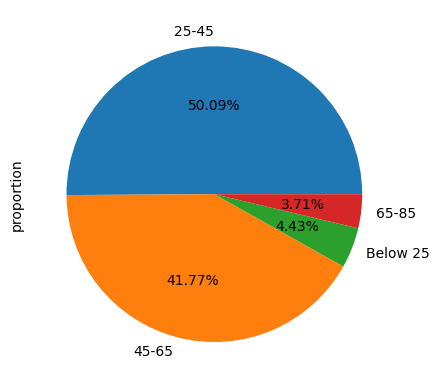

In [121]:
app_df["AGE_Category"].value_counts(normalize=True).plot.pie(autopct = '%1.2f%%')
plt.show()

- Conclusion: Most of the applicants are between 24-25 age group

### Data Imbalance Check


In [122]:
app_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE,AMT_CREDIT_Category,AGE_Category
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,26,1,10,5,3,Medium Credit,25-45
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,47,3,3,0,2,NaN,45-65
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,53,0,11,7,2,Very low Credit,45-65
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.535276,2.0,0.0,2.0,0.0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,53,8,27,6,1,Low Credit,45-65
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.535276,0.0,0.0,0.0,0.0,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,55,8,12,9,3,Medium Credit,45-65


## Diving Application Dataset with Target variable as 0 and 1

In [123]:
tar_0 = app_df[app_df.TARGET == 0]
tar_1 = app_df[app_df.TARGET == 1]

In [124]:
app_df.TARGET.value_counts(normalize=True)*100

TARGET
0    91.927118
1     8.072882
Name: proportion, dtype: float64

- Conclusion: 1 out of 9/10 applicants are defaults

### Univariate analysis

In [125]:
cat_cols = list(app_df.columns[app_df.dtypes == np.object_])
num_cols = list(app_df.columns[app_df.dtypes == np.int64]) + list(app_df.columns[app_df.dtypes == np.float64])

In [126]:
cat_cols

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']

In [127]:
num_cols

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21',
 'YEARS_BIRTH',
 'YEARS_EMPLOYED',
 'YEARS_REGISTRATION',
 'YEARS_ID_PUBLISH',
 'YEARS_LAST_PHONE_CHANGE',
 'AMT_INCOME_TOTAL'

NAME_CONTRACT_TYPE
Cash loans         0.904787
Revolving loans    0.095213
Name: proportion, dtype: float64


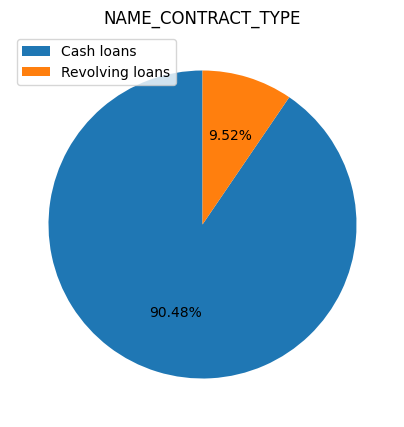

CODE_GENDER
F      0.658344
M      0.341643
XNA    0.000013
Name: proportion, dtype: float64


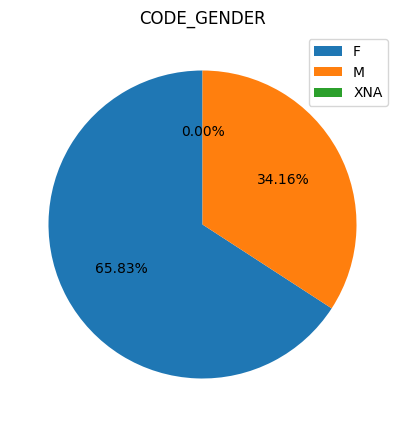

FLAG_OWN_CAR
N    0.659892
Y    0.340108
Name: proportion, dtype: float64


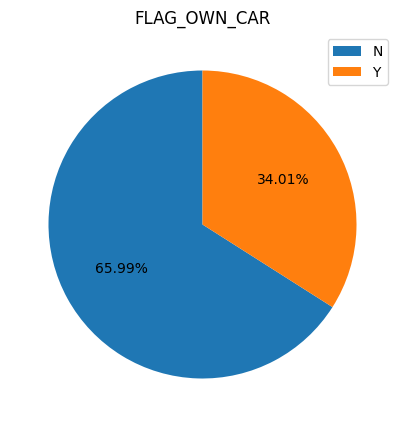

FLAG_OWN_REALTY
Y    0.693673
N    0.306327
Name: proportion, dtype: float64


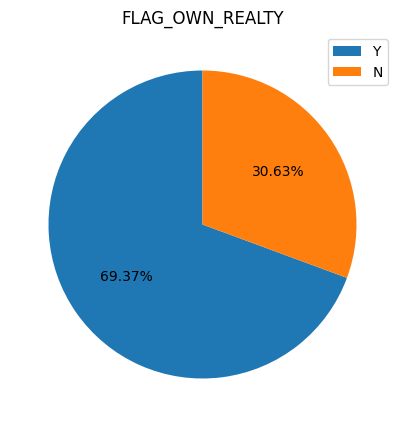

NAME_TYPE_SUITE
Unaccompanied      0.812387
Family             0.130561
Spouse, partner    0.036974
Children           0.010624
Other_B            0.005756
Other_A            0.002816
Group of people    0.000881
Name: proportion, dtype: float64


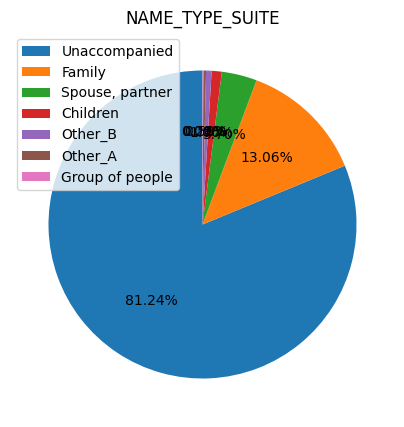

NAME_INCOME_TYPE
Working                 0.516320
Commercial associate    0.232892
Pensioner               0.180033
State servant           0.070576
Unemployed              0.000072
Student                 0.000059
Businessman             0.000033
Maternity leave         0.000016
Name: proportion, dtype: float64


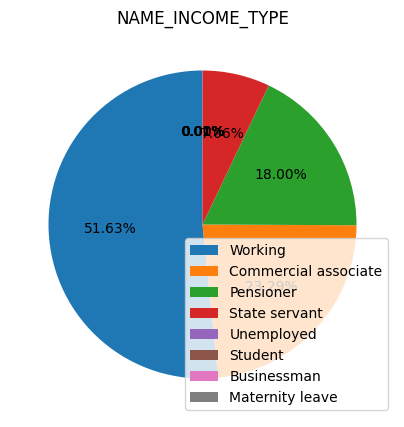

NAME_EDUCATION_TYPE
Secondary / secondary special    0.710189
Higher education                 0.243448
Incomplete higher                0.033420
Lower secondary                  0.012409
Academic degree                  0.000533
Name: proportion, dtype: float64


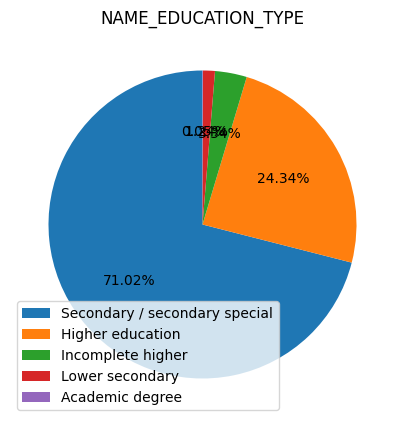

NAME_FAMILY_STATUS
Married                 0.638780
Single / not married    0.147780
Civil marriage          0.096826
Separated               0.064290
Widow                   0.052317
Unknown                 0.000007
Name: proportion, dtype: float64


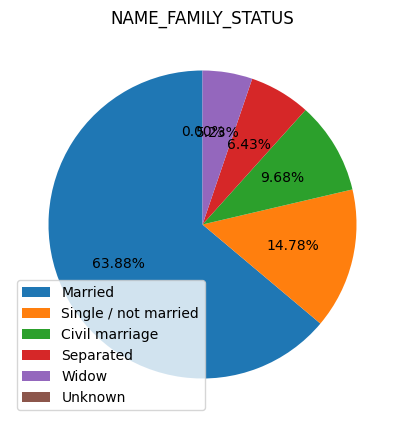

NAME_HOUSING_TYPE
House / apartment      0.887344
With parents           0.048258
Municipal apartment    0.036366
Rented apartment       0.015873
Office apartment       0.008510
Co-op apartment        0.003649
Name: proportion, dtype: float64


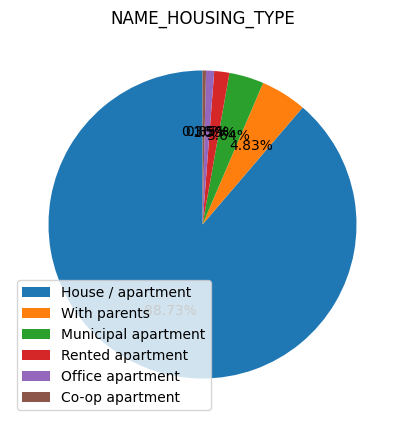

OCCUPATION_TYPE
Others                   0.313455
Laborers                 0.179460
Sales staff              0.104393
Core staff               0.089655
Managers                 0.069497
Drivers                  0.060495
High skill tech staff    0.037007
Accountants              0.031911
Medicine staff           0.027762
Security staff           0.021856
Cooking staff            0.019336
Cleaning staff           0.015131
Private service staff    0.008624
Low-skill Laborers       0.006806
Waiters/barmen staff     0.004384
Secretaries              0.004244
Realty agents            0.002442
HR staff                 0.001831
IT staff                 0.001711
Name: proportion, dtype: float64


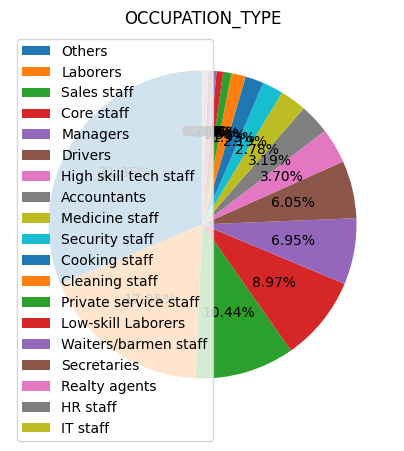

CNT_FAM_MEMBERS
2.0              0.514964
1.0              0.220633
3.0              0.171054
4.0              0.080313
5.0              0.011310
6.0              0.001327
7.0              0.000263
8.0              0.000065
9.0              0.000020
10.0             0.000010
Unaccompanied    0.000007
14.0             0.000007
12.0             0.000007
20.0             0.000007
16.0             0.000007
13.0             0.000003
15.0             0.000003
11.0             0.000003
Name: proportion, dtype: float64


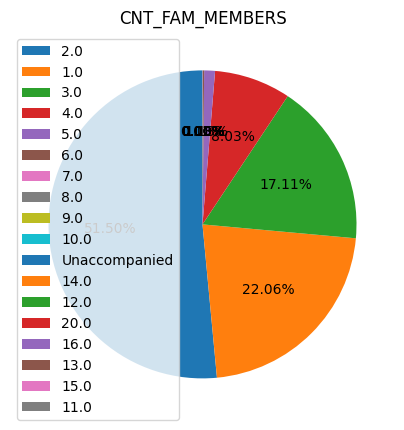

WEEKDAY_APPR_PROCESS_START
TUESDAY      0.175282
WEDNESDAY    0.168885
MONDAY       0.164918
THURSDAY     0.164518
FRIDAY       0.163695
SATURDAY     0.110084
SUNDAY       0.052619
Name: proportion, dtype: float64


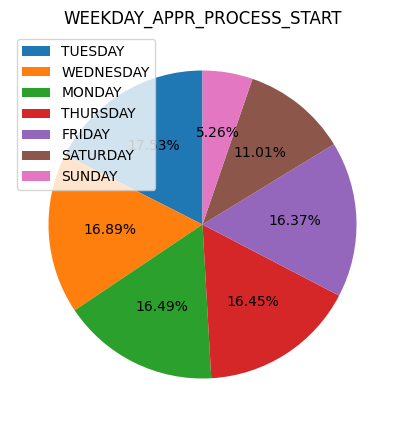

ORGANIZATION_TYPE
Business Entity Type 3    0.221104
XNA                       0.180072
Self-employed             0.124913
Other                     0.054252
Medicine                  0.036399
Business Entity Type 2    0.034317
Government                0.033833
School                    0.028919
Trade: type 7             0.025466
Kindergarten              0.022373
Construction              0.021856
Business Entity Type 1    0.019459
Transport: type 4         0.017554
Trade: type 3             0.011356
Industry: type 9          0.010952
Industry: type 3          0.010660
Security                  0.010559
Housing                   0.009619
Industry: type 11         0.008793
Military                  0.008566
Bank                      0.008153
Agriculture               0.007980
Police                    0.007613
Transport: type 2         0.007167
Postal                    0.007014
Security Ministries       0.006419
Trade: type 2             0.006179
Restaurant                0.005889
Se

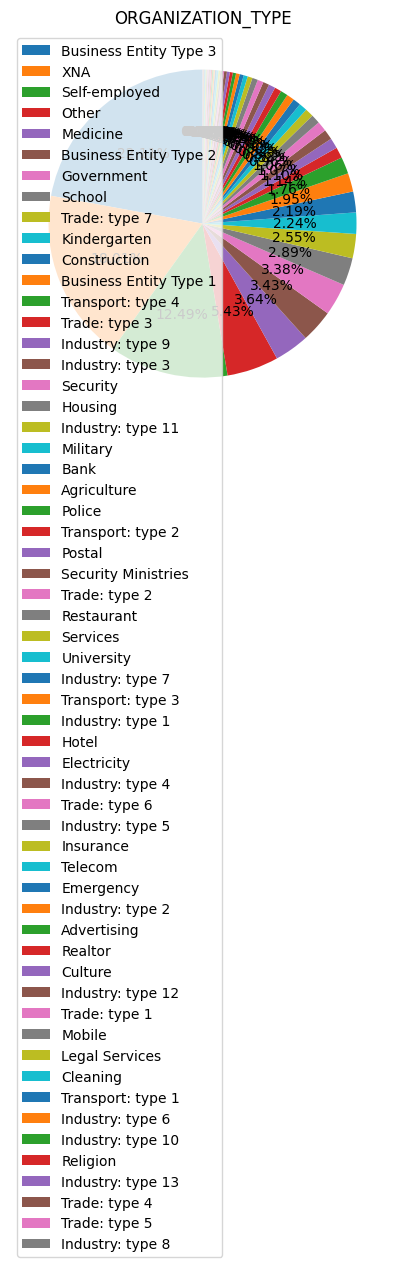

In [128]:
for col in cat_cols:
    print(app_df[col].value_counts(normalize=True))
    
    plt.figure(figsize=[5, 5])  # Corrected: create a new figure
    app_df[col].value_counts(normalize=True).plot.pie(
        labeldistance=None,
        autopct='%1.2f%%',
        startangle=90
    )
    plt.title(col)
    plt.ylabel('')  # Hides y-label for cleaner pie chart
    plt.legend()
    plt.show()


- Conclusion >> Insights on below columns


  1.NAME_CONTRACT_TYPE - More application have cash loans than Revolving loans 

  2.CODE_GENDER - Number of Female application are twice than that of the male applicants 

  3.FLAG_OWN_CAR - Most(70%) of the applicants do not owm a car 

  4.FLAG_OWN_REALTY - Most(70%) of the applicants do not own a house

  5.NAME_TYPE_SUITE - Most(80%) of the applicants are unaccompanied 

  6.NAME_INCOME_TYPE - Most(51%) of the applicants are earning their income from work 

  7.NAME_EDUCATION_TYPE - 71% of the applicants have complete Secondary / Secondary special education 

  8.NAME_FAMILY_STATUS - 63% of the applicants are mamed 

  9.NAME_HOUSING_TYPE - 88% of the housing type of applicants have other Occupation type  

  10.OCCUPATION_TYPE - Most(31%) of the applicants have other Occupation type 

  11.WEEKDAY_APPR_PROCESS_START - Most of the applicants have applied the loan in tuesday 

  12.ORGANIZATION_TYPE - Most of the Organization type of employees are business Entry type 3 

### Plot on Numerical Columns

#### Categorizing columns with and without flags


In [129]:
num_cols_withoutflag = []
num_cols_withflag = []
for col in num_cols:
    if col.startswith("FLAG"):
        num_cols_withflag.append(col)
    else:
        num_cols_withoutflag.append(col)

In [130]:
num_cols_withflag

['FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [131]:
num_cols_withoutflag

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'YEARS_BIRTH',
 'YEARS_EMPLOYED',
 'YEARS_REGISTRATION',
 'YEARS_ID_PUBLISH',
 'YEARS_LAST_PHONE_CHANGE',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_REGISTRATION',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

count    307511.000000
mean     278180.518577
std      102790.175348
min      100002.000000
25%      189145.500000
50%      278202.000000
75%      367142.500000
max      456255.000000
Name: SK_ID_CURR, dtype: float64


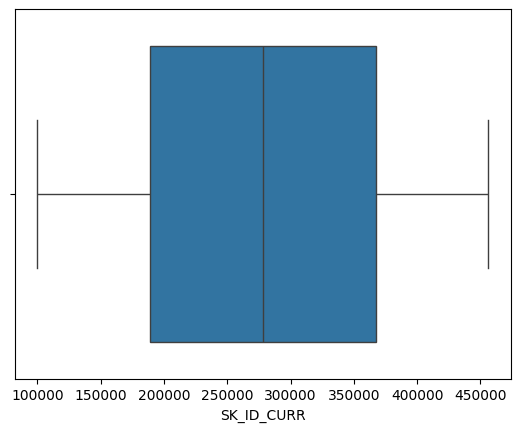

-----------------------
count    307511.000000
mean          0.080729
std           0.272419
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: TARGET, dtype: float64


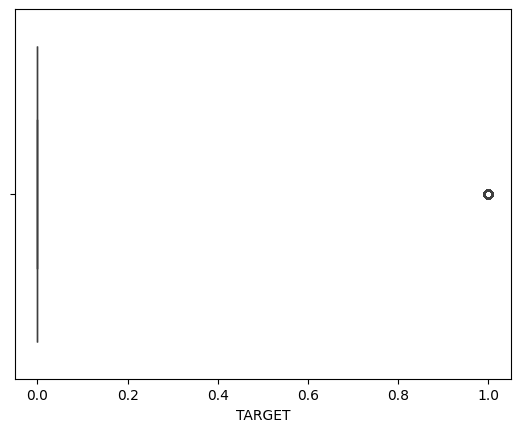

-----------------------
count    307511.000000
mean          0.417052
std           0.722121
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64


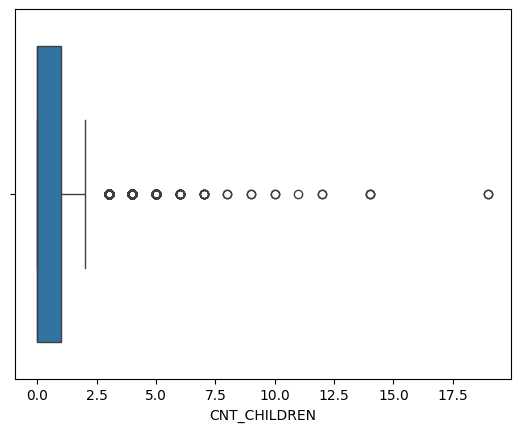

-----------------------
count    307511.000000
mean      16036.995067
std        4363.988632
min        7489.000000
25%       12413.000000
50%       15750.000000
75%       19682.000000
max       25229.000000
Name: DAYS_BIRTH, dtype: float64


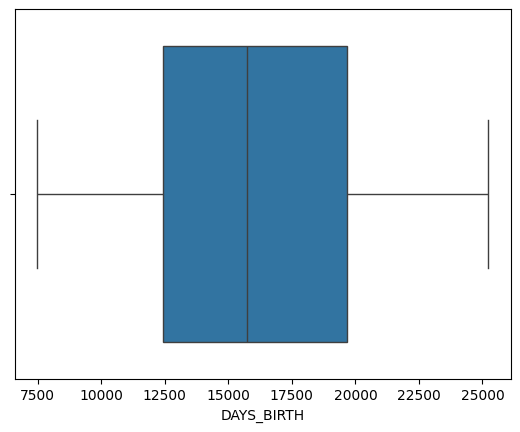

-----------------------
count    307511.000000
mean      67724.742149
std      139443.751806
min           0.000000
25%         933.000000
50%        2219.000000
75%        5707.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64


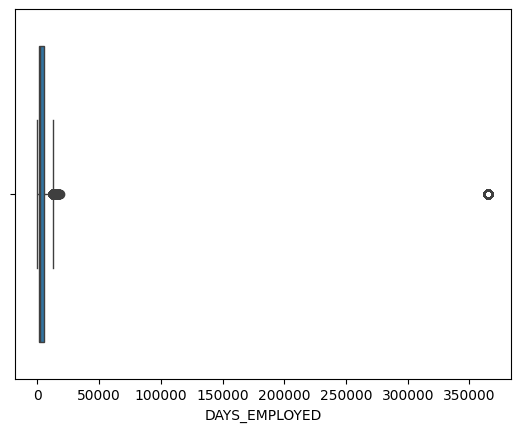

-----------------------
count    307511.000000
mean       2994.202373
std        1509.450419
min           0.000000
25%        1720.000000
50%        3254.000000
75%        4299.000000
max        7197.000000
Name: DAYS_ID_PUBLISH, dtype: float64


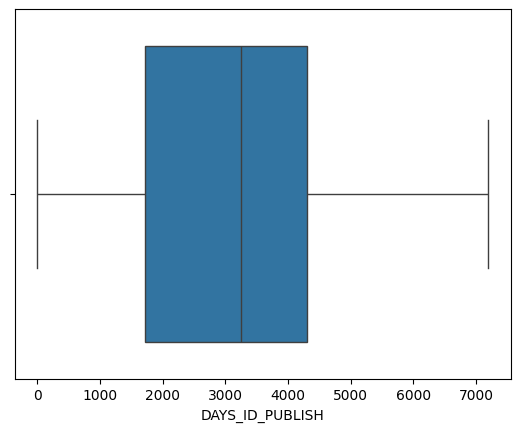

-----------------------
count    307511.000000
mean          2.052463
std           0.509034
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           3.000000
Name: REGION_RATING_CLIENT, dtype: float64


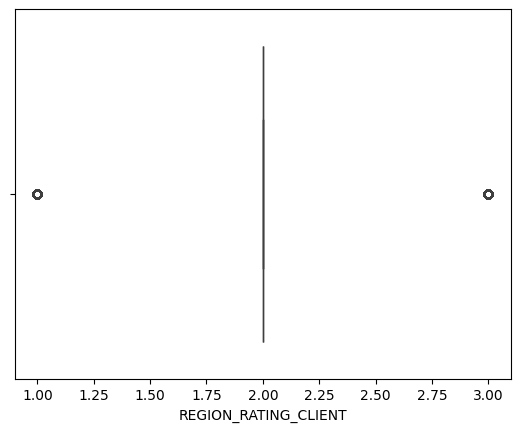

-----------------------
count    307511.000000
mean          2.031521
std           0.502737
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           3.000000
Name: REGION_RATING_CLIENT_W_CITY, dtype: float64


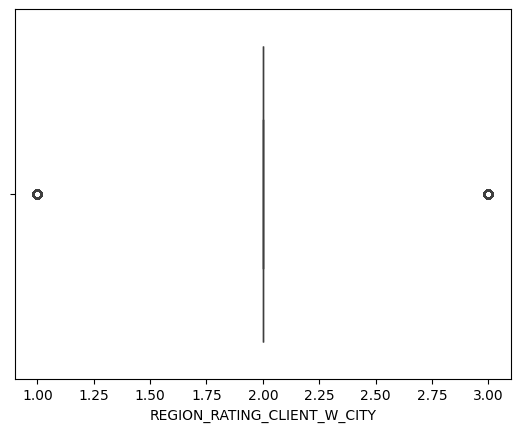

-----------------------
count    307511.000000
mean         12.063419
std           3.265832
min           0.000000
25%          10.000000
50%          12.000000
75%          14.000000
max          23.000000
Name: HOUR_APPR_PROCESS_START, dtype: float64


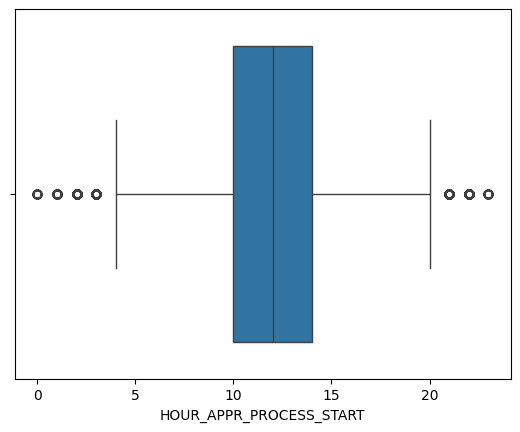

-----------------------
count    307511.000000
mean          0.015144
std           0.122126
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: REG_REGION_NOT_LIVE_REGION, dtype: float64


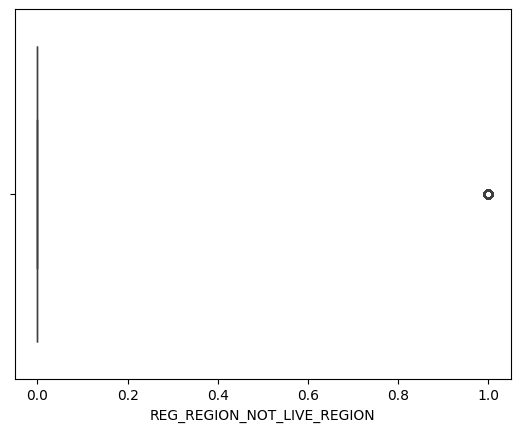

-----------------------
count    307511.000000
mean          0.050769
std           0.219526
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: REG_REGION_NOT_WORK_REGION, dtype: float64


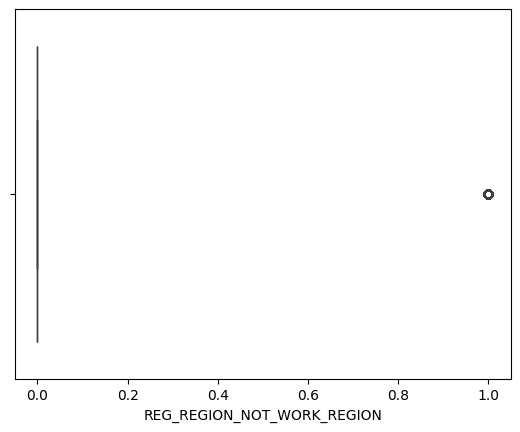

-----------------------
count    307511.000000
mean          0.040659
std           0.197499
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: LIVE_REGION_NOT_WORK_REGION, dtype: float64


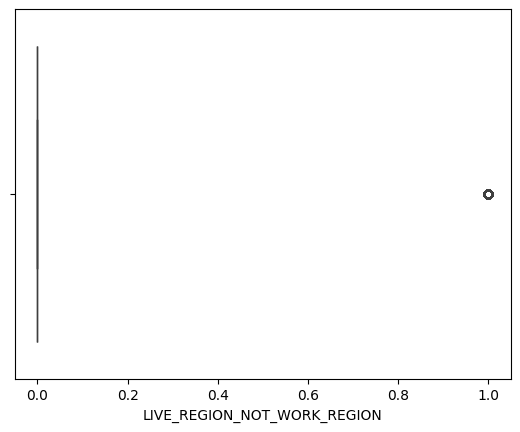

-----------------------
count    307511.000000
mean          0.078173
std           0.268444
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: REG_CITY_NOT_LIVE_CITY, dtype: float64


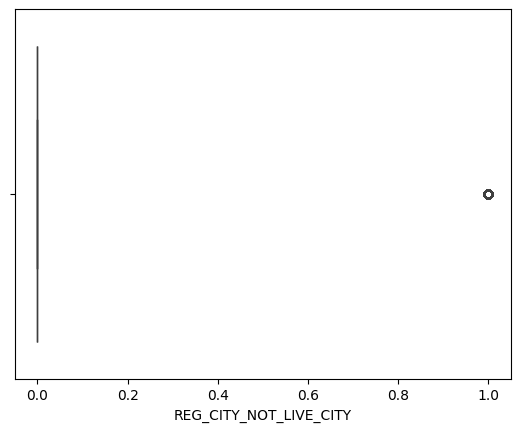

-----------------------
count    307511.000000
mean          0.230454
std           0.421124
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: REG_CITY_NOT_WORK_CITY, dtype: float64


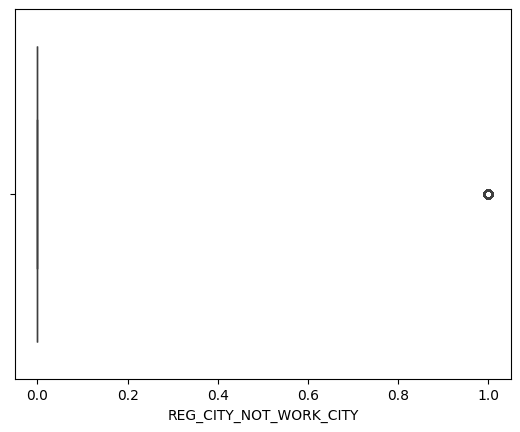

-----------------------
count    307511.000000
mean          0.179555
std           0.383817
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: LIVE_CITY_NOT_WORK_CITY, dtype: float64


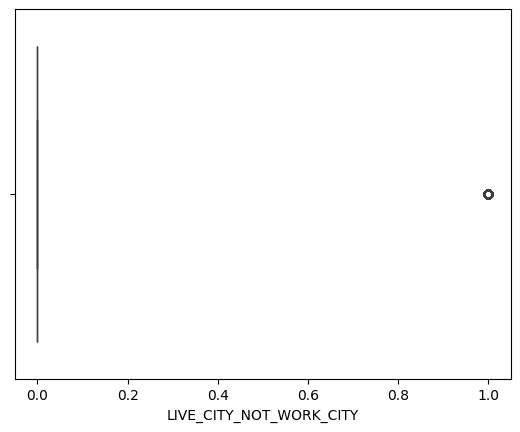

-----------------------
count    307511.000000
mean         44.548992
std          12.263409
min          21.000000
25%          34.000000
50%          44.000000
75%          55.000000
max          70.000000
Name: YEARS_BIRTH, dtype: float64


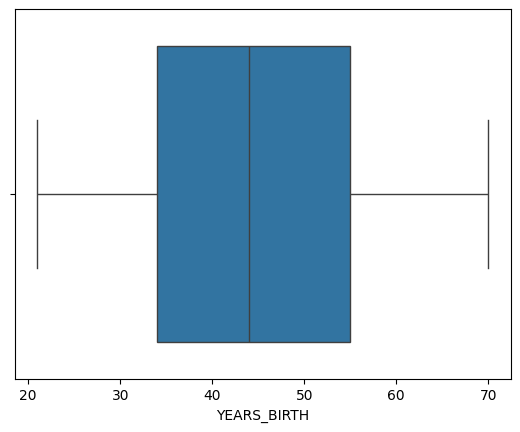

-----------------------
count    307511.000000
mean        189.656025
std         391.517218
min           0.000000
25%           2.000000
50%           6.000000
75%          16.000000
max        1025.000000
Name: YEARS_EMPLOYED, dtype: float64


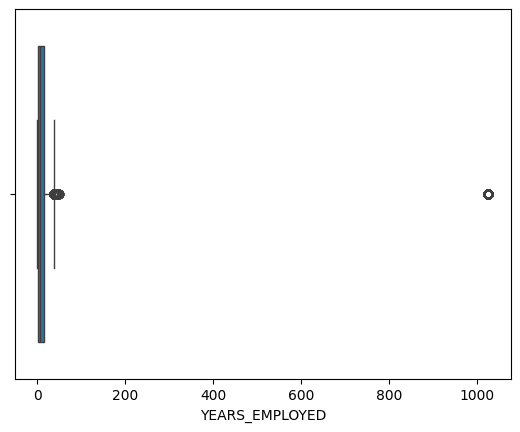

-----------------------
count    307511.000000
mean         13.513478
std           9.891137
min           0.000000
25%           5.000000
50%          12.000000
75%          21.000000
max          69.000000
Name: YEARS_REGISTRATION, dtype: float64


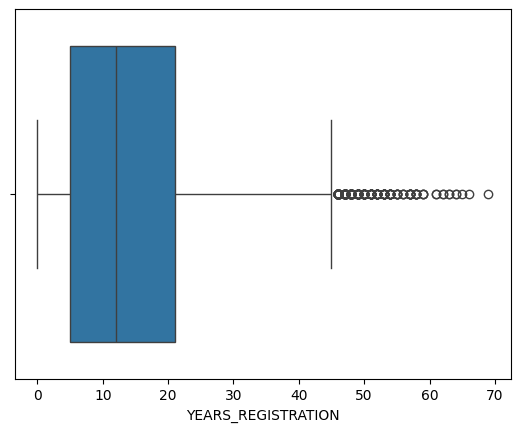

-----------------------
count    307511.000000
mean          7.920845
std           4.238167
min           0.000000
25%           4.000000
50%           9.000000
75%          12.000000
max          20.000000
Name: YEARS_ID_PUBLISH, dtype: float64


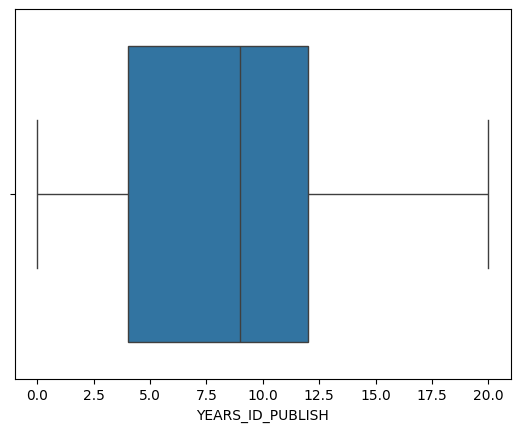

-----------------------
count    307511.000000
mean          2.293102
std           2.249671
min           0.000000
25%           0.000000
50%           2.000000
75%           4.000000
max          12.000000
Name: YEARS_LAST_PHONE_CHANGE, dtype: float64


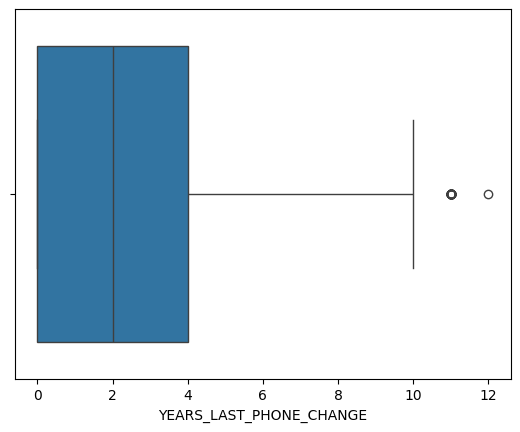

-----------------------
count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


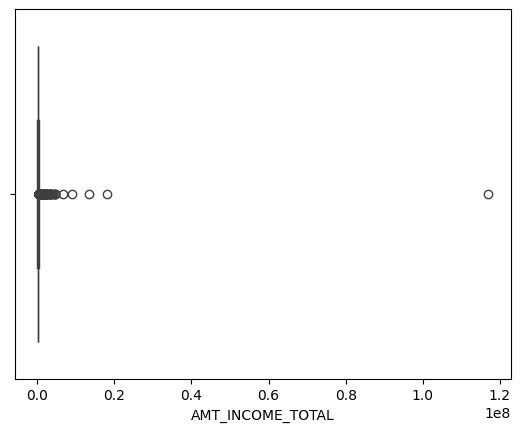

-----------------------
count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64


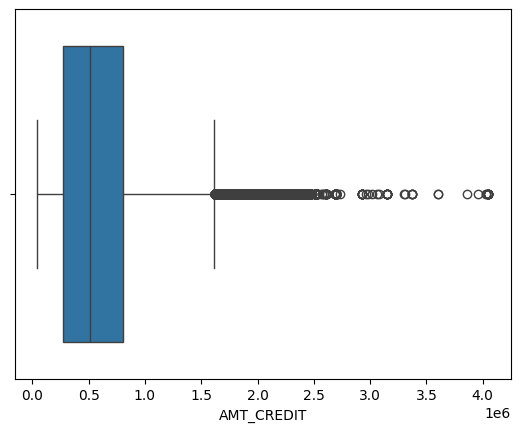

-----------------------
count    307511.000000
mean      27108.487841
std       14493.461065
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64


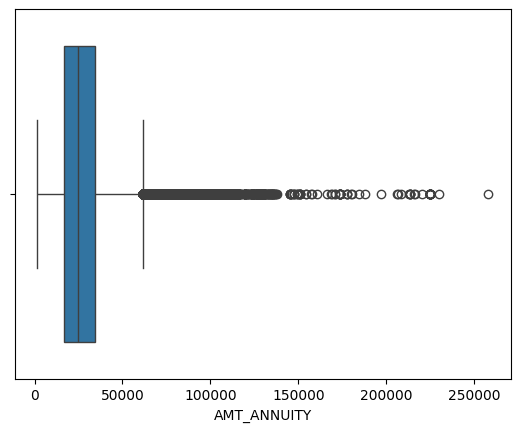

-----------------------
count    3.075110e+05
mean     5.383163e+05
std      3.692890e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64


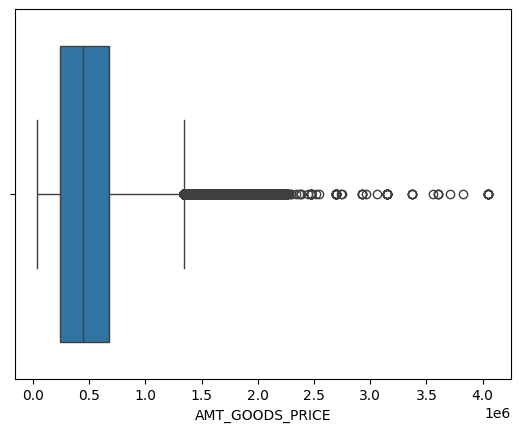

-----------------------
count    307511.000000
mean          0.020868
std           0.013831
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64


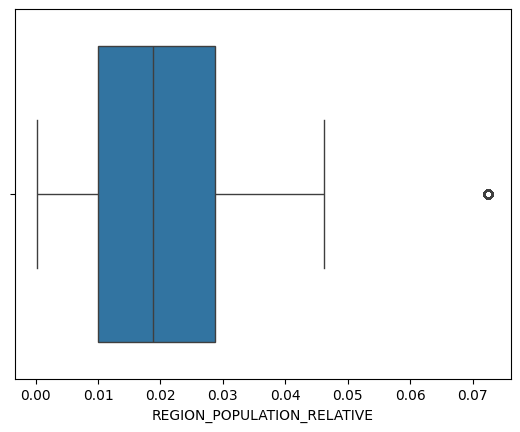

-----------------------
count    307511.000000
mean       4986.120328
std        3522.886321
min           0.000000
25%        2010.000000
50%        4504.000000
75%        7479.500000
max       24672.000000
Name: DAYS_REGISTRATION, dtype: float64


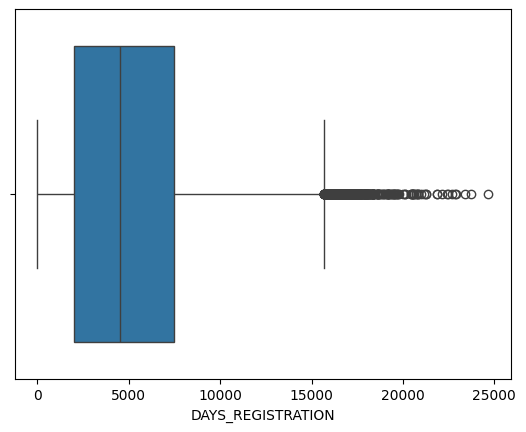

-----------------------
count    3.075110e+05
mean     5.145034e-01
std      1.908699e-01
min      8.173617e-08
25%      3.929737e-01
50%      5.659614e-01
75%      6.634218e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64


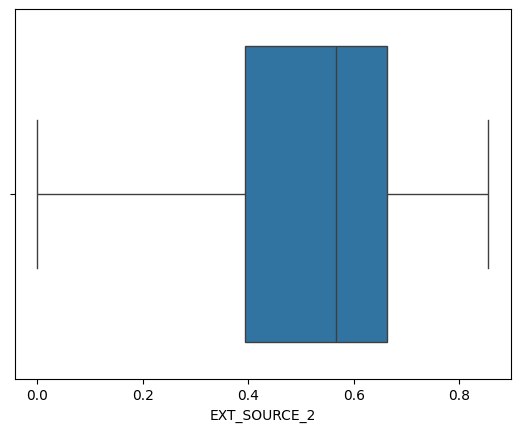

-----------------------
count    307511.000000
mean          0.515695
std           0.174736
min           0.000527
25%           0.417100
50%           0.535276
75%           0.636376
max           0.896010
Name: EXT_SOURCE_3, dtype: float64


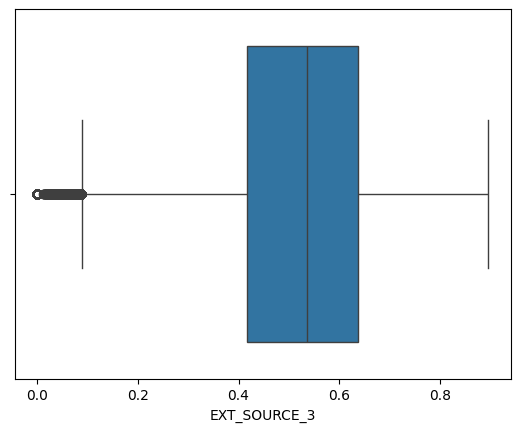

-----------------------
count    307511.000000
mean          1.417523
std           2.398395
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64


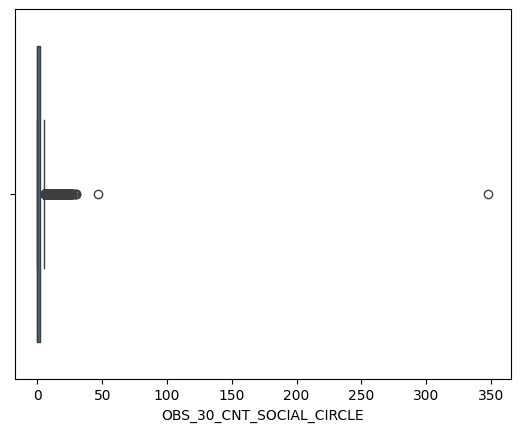

-----------------------
count    307511.000000
mean          0.142944
std           0.446033
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64


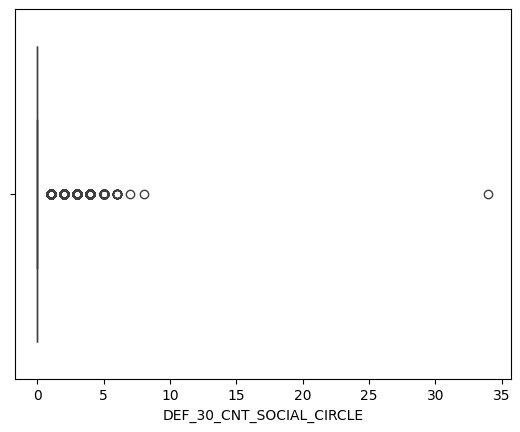

-----------------------
count    307511.000000
mean          1.400626
std           2.377224
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64


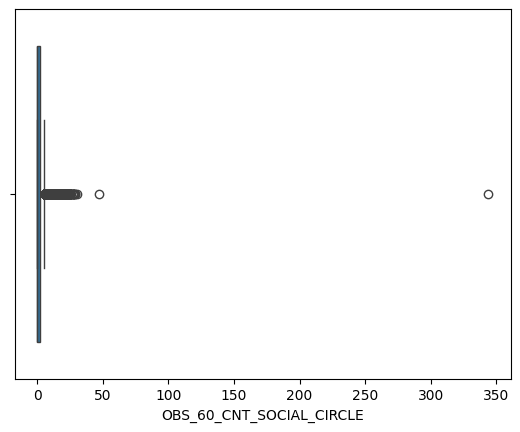

-----------------------
count    307511.000000
mean          0.099717
std           0.361735
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          24.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64


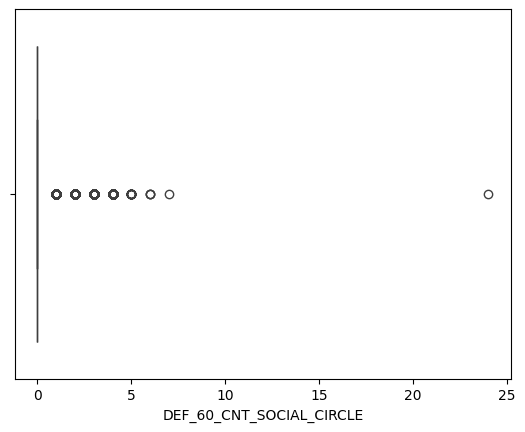

-----------------------
count    307511.000000
mean        962.858119
std         826.807226
min           0.000000
25%         274.000000
50%         757.000000
75%        1570.000000
max        4292.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64


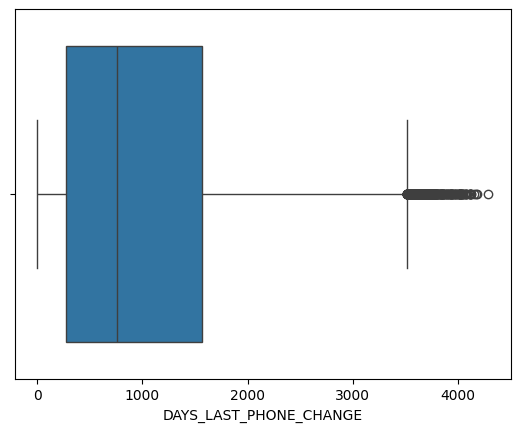

-----------------------
count    307511.000000
mean          0.005538
std           0.078014
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64


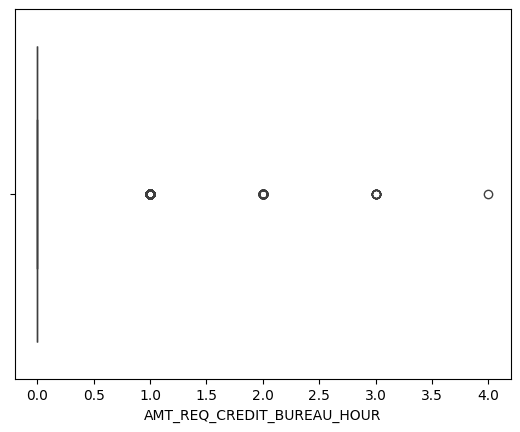

-----------------------
count    307511.000000
mean          0.006055
std           0.103037
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64


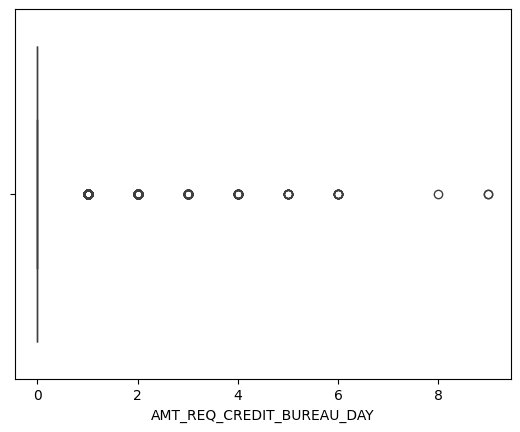

-----------------------
count    307511.000000
mean          0.029723
std           0.190728
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64


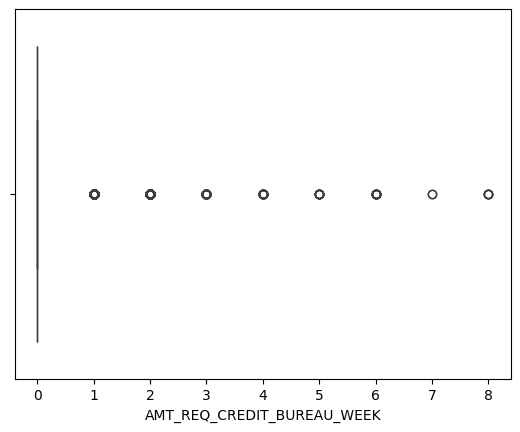

-----------------------
count    307511.000000
mean          0.231293
std           0.856810
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64


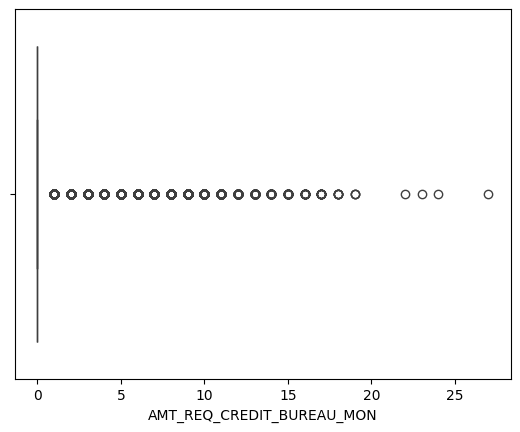

-----------------------
count    307511.000000
mean          0.229631
std           0.744059
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64


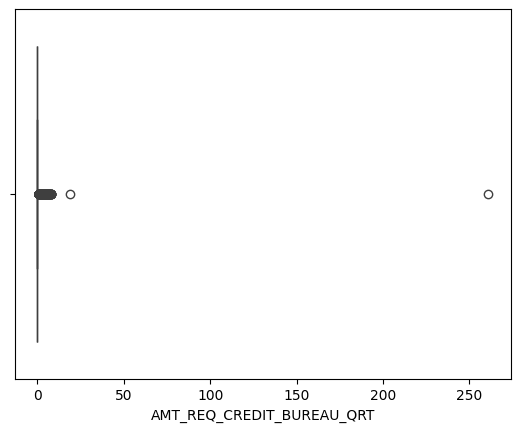

-----------------------
count    307511.000000
mean          1.643447
std           1.855821
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64


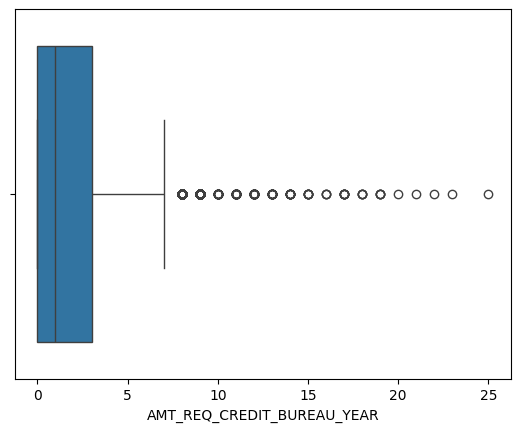

-----------------------


In [132]:
for col in num_cols_withoutflag:
    print(app_df[col].describe())
    plt.Figure(figsize=[8,5])
    sns.boxplot(data=app_df,x=col)
    plt.show()
    print("-----------------------")

- Conclusion >> Few Columns are with outliers are below

 1.AMT_INCOME_TOTAL Column has a few outliers and there is a huge difference between the 99th percentile and the max value, also we could see huge variation in mean and median due to outliers

 2.AMT_CREDIT Column has a few outliers and there is a huge difference between the 99th percentile and the max value, also we could see huge variation in mean and median due to outliers

 3.AMT_ANNUITY Column has a few outliers and there is a huge difference between the 99th percentile and the max value, also we could see significant variation in mean and median due to outliers

 4.AMT_GOODS_PRICE Column has a few outliers and there is a huge difference between the 99th percentile and the max value, also we could see significant variation in mean and median due to outliers

 5.REGION_POPULATION_RELATIVE Column has a one outliers and there not much difference between mean and median

### Univariate Analysis on columns with Target 0 and 1

Plot on NAME_CONTRACT_TYPE for Target 0 and 1


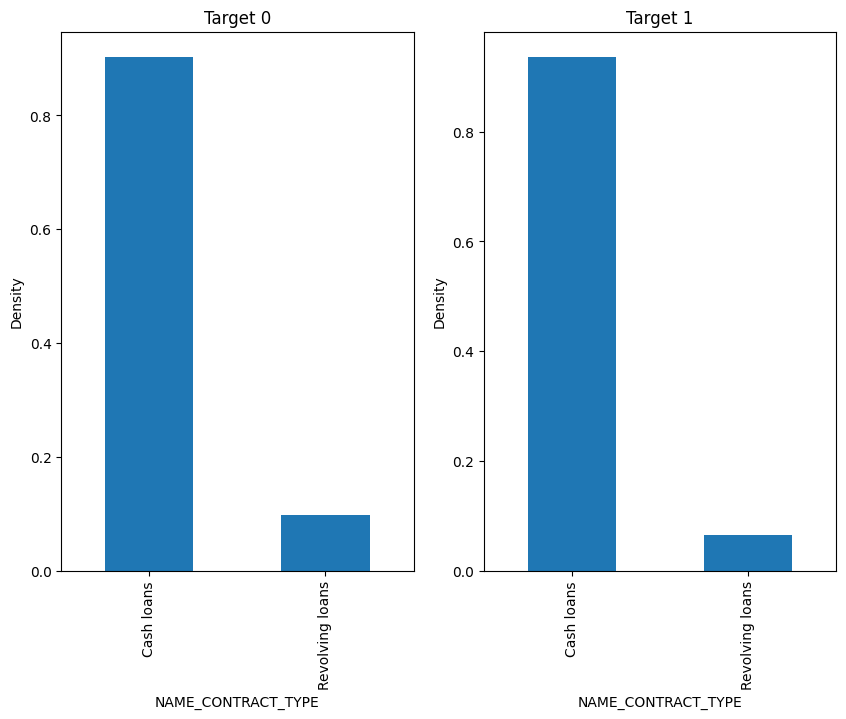



 ------------------------------------------------------------------ 


Plot on CODE_GENDER for Target 0 and 1


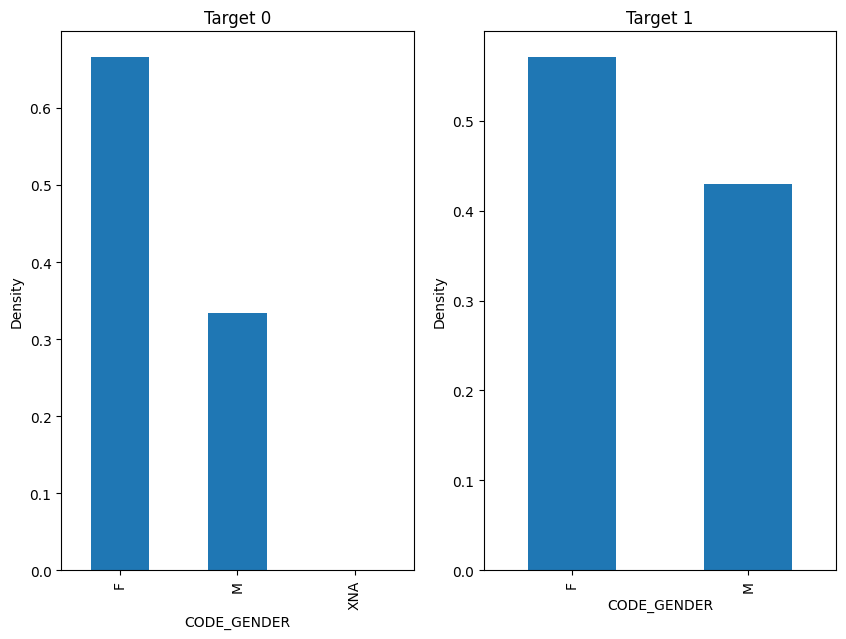



 ------------------------------------------------------------------ 


Plot on FLAG_OWN_CAR for Target 0 and 1


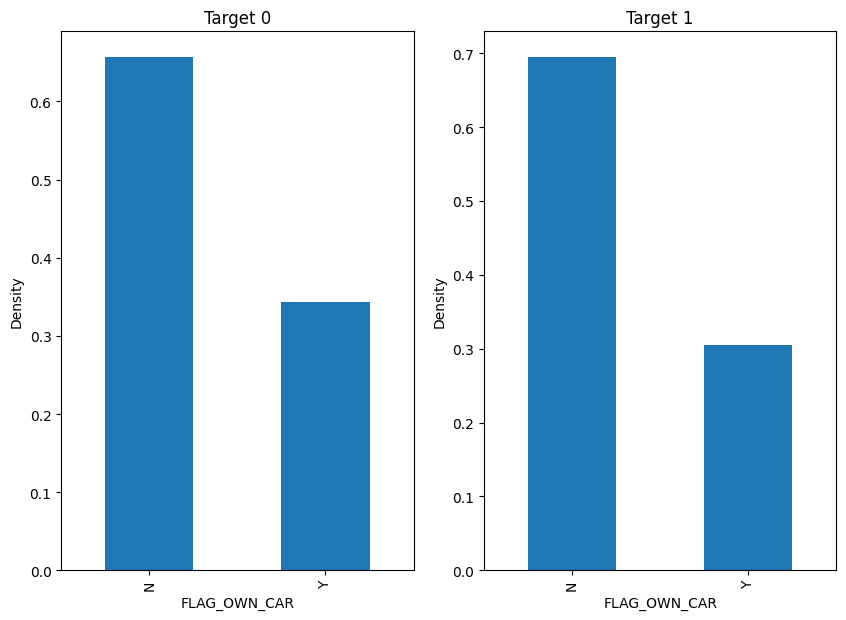



 ------------------------------------------------------------------ 


Plot on FLAG_OWN_REALTY for Target 0 and 1


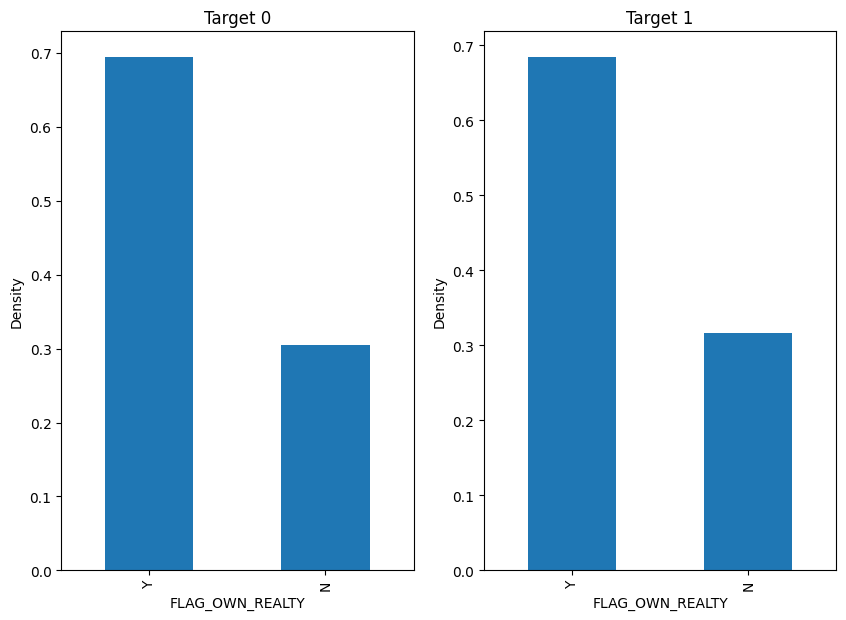



 ------------------------------------------------------------------ 


Plot on NAME_TYPE_SUITE for Target 0 and 1


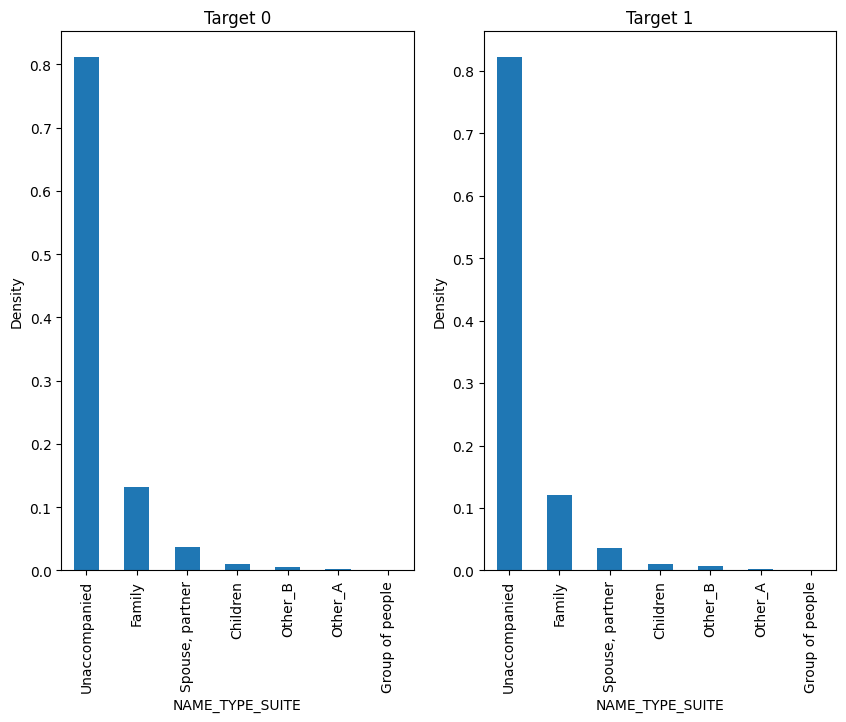



 ------------------------------------------------------------------ 


Plot on NAME_INCOME_TYPE for Target 0 and 1


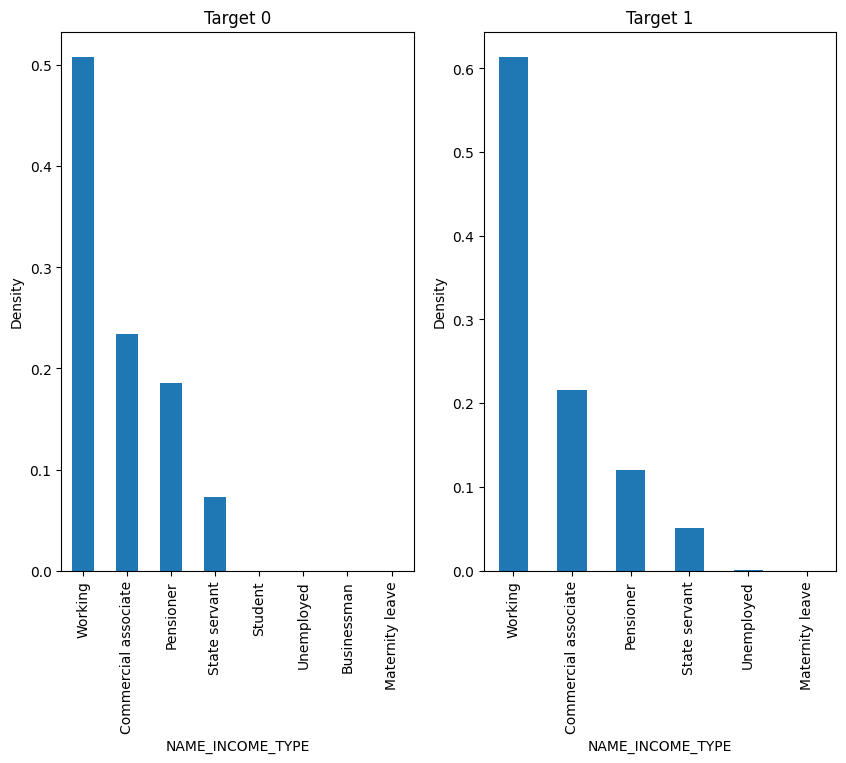



 ------------------------------------------------------------------ 


Plot on NAME_EDUCATION_TYPE for Target 0 and 1


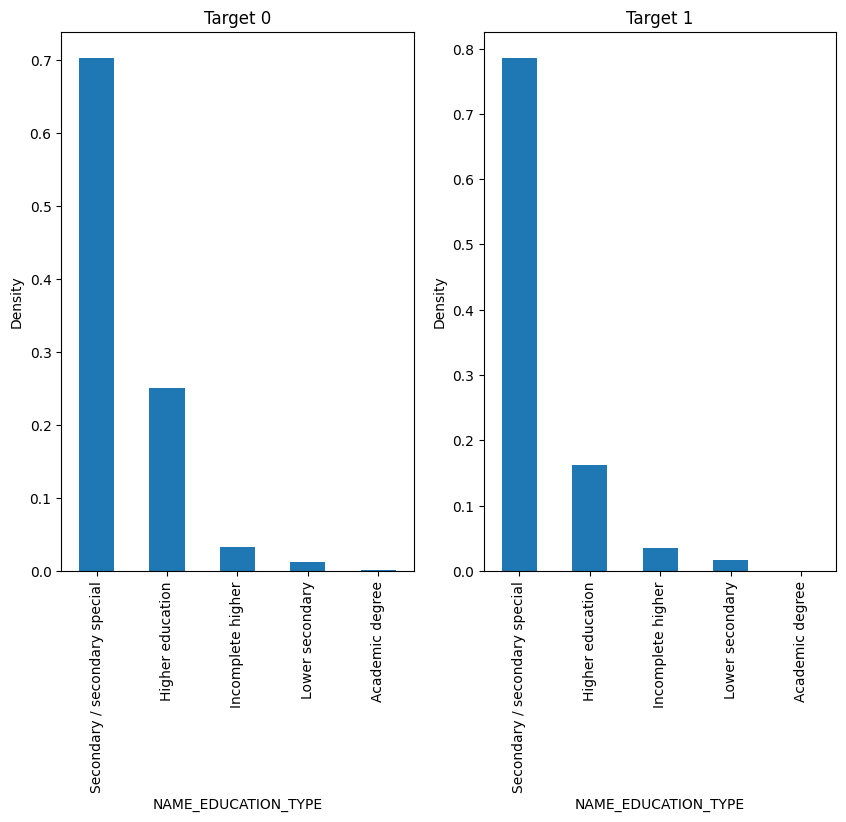



 ------------------------------------------------------------------ 


Plot on NAME_FAMILY_STATUS for Target 0 and 1


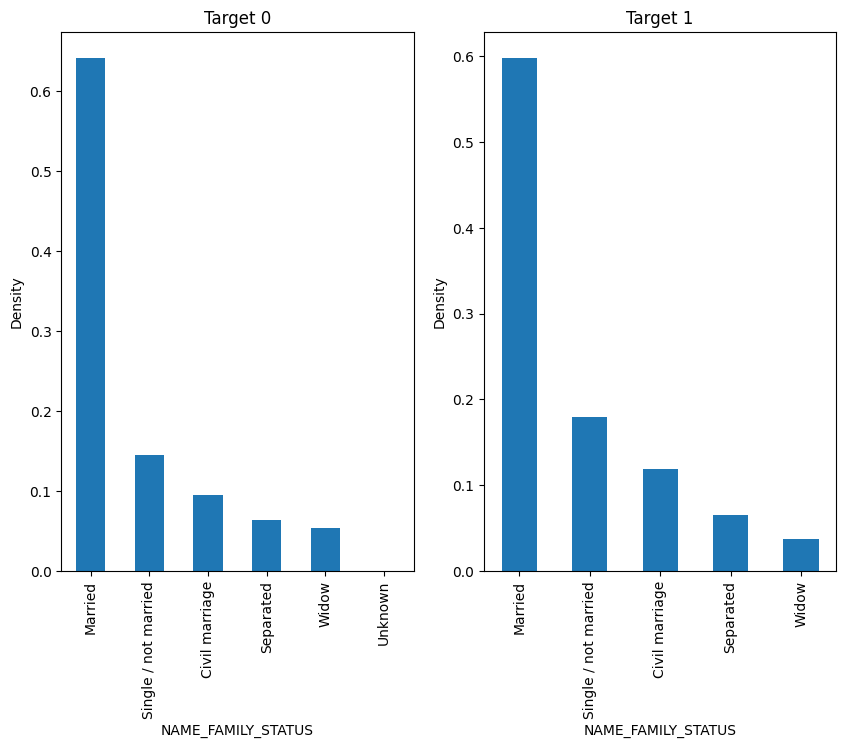



 ------------------------------------------------------------------ 


Plot on NAME_HOUSING_TYPE for Target 0 and 1


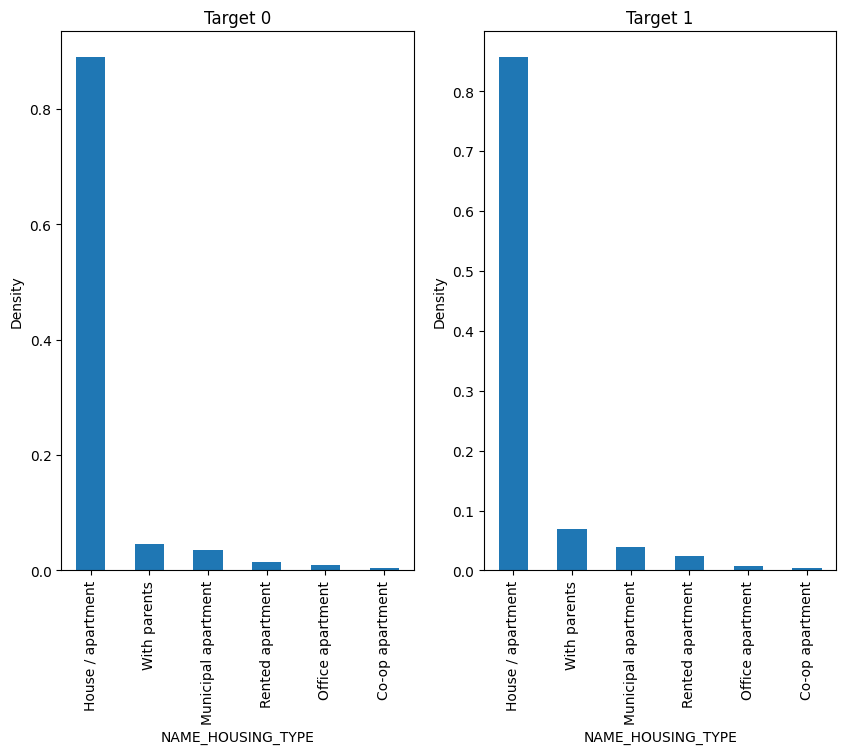



 ------------------------------------------------------------------ 


Plot on OCCUPATION_TYPE for Target 0 and 1


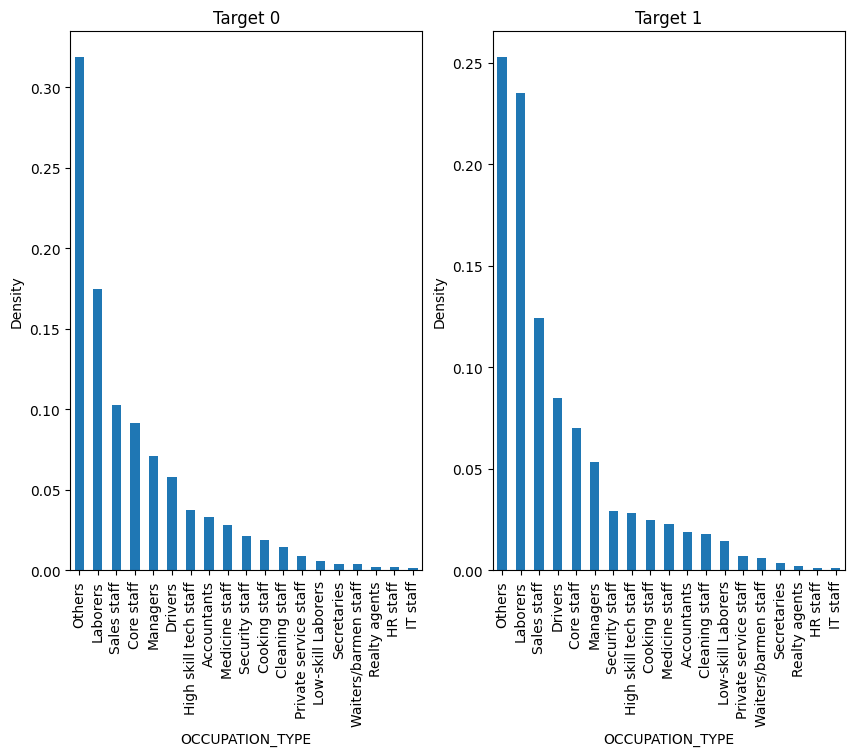



 ------------------------------------------------------------------ 


Plot on CNT_FAM_MEMBERS for Target 0 and 1


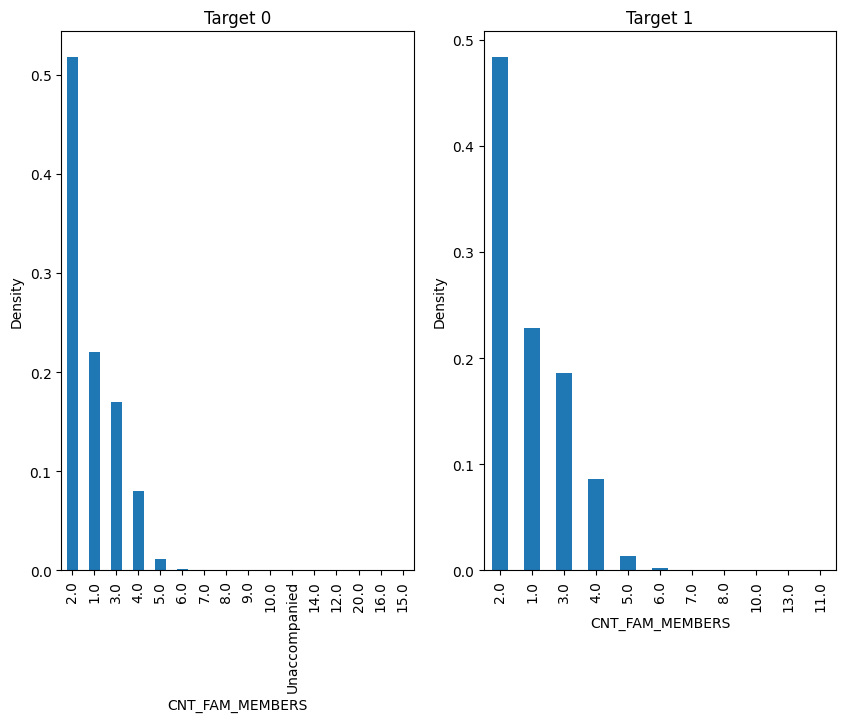



 ------------------------------------------------------------------ 


Plot on WEEKDAY_APPR_PROCESS_START for Target 0 and 1


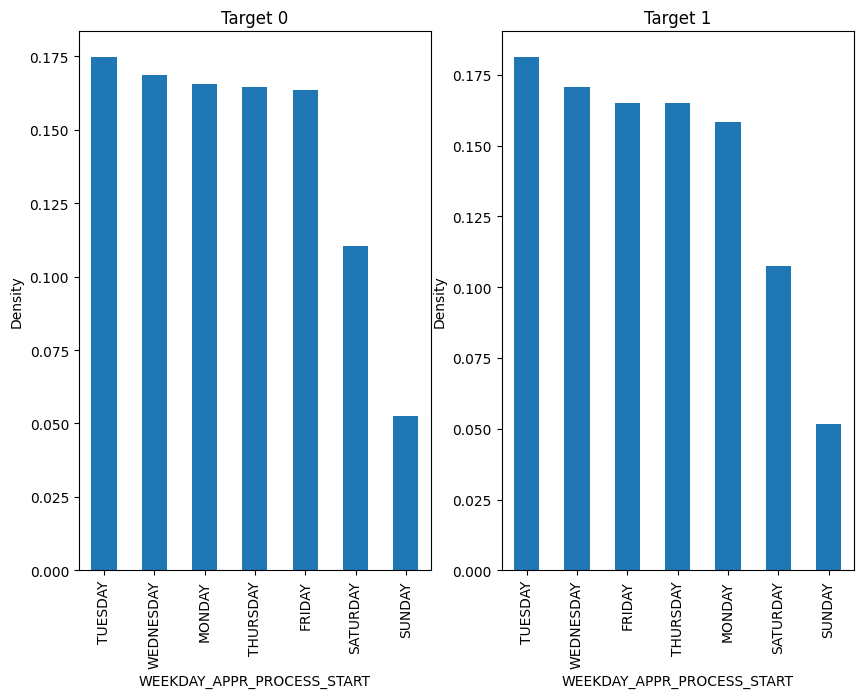



 ------------------------------------------------------------------ 


Plot on ORGANIZATION_TYPE for Target 0 and 1


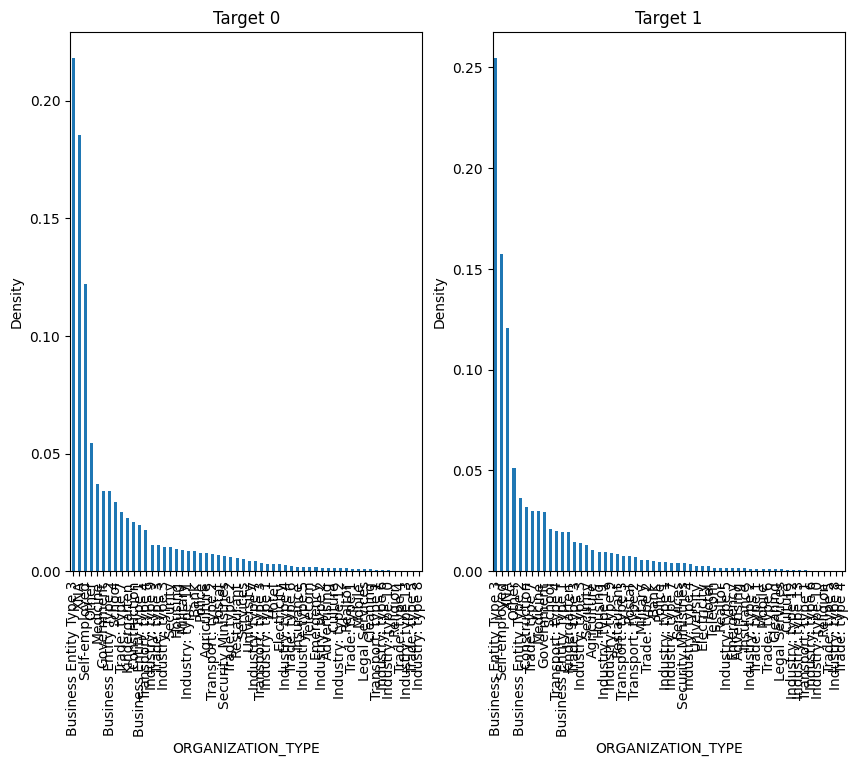



 ------------------------------------------------------------------ 




In [135]:
for col in cat_cols:
    print(f'Plot on {col} for Target 0 and 1')
    plt.figure(figsize=[10,7])
    plt.subplot(1,2,1)
    tar_0[col].value_counts(normalize=True).plot.bar()
    plt.title("Target 0")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.subplot(1,2,2)
    tar_1[col].value_counts(normalize=True).plot.bar()
    plt.title("Target 1")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.show()
    print("\n\n ------------------------------------------------------------------ \n\n")

- Conclusion >> Below are the column insights

1.NAME_CONTRACT TYPE- The Applicants are receiving more of Cash loans than Revolving loans both for Target 0 and 1

2.CODE_GENDER - Number of Female applicants are twice than that of male applicants both for Target 0 and 1

3.FLAG_OWN_CAR - Most(70%) of the applicants do not own a car both for Target 0 and 1

4.FLAG_OWN_REALTY - Most(70%) of the applicants do not own a house both for Target 0 and 1

5.NAME_TYPE_SUITE - Most(81%) of the applicants are Unaccompanied both for Target 0 and 1

6.NAME_INCOME_TYPE - For both Target 0 and 1, Most(51%) of the applicants are earning their income from Work

7.NAME_EDUCATION_TYPE - For both Target 0 and 1, almost 71% of the applicants have completed Secondary / secondary special education

8.NAME_FAMILY_STATUS-63% of the applicants are married for both Target 0 and 1

9.NAME_HOUSING_TYPE-88% of the housing type of applicants are House/apartment for both Target 0 and 1

10.OCCUPATION_TYPE - Most(31%) of the applicants have other Occupation type, are non defaulters and Laborere, Sales staff, Drivers and core staff are not able to repay the loan on time

11.WEEKDAY_APPR_PROCESS_START- Most of the applicant have applied the loan on Tuseday and the least on Sunday

12.ORGANIZATION_TYPE - Most of the Applicants are working in Business Entity Type 3, Self Employed and other Organization type

### Analysis on AMT_GOODS_PRICE on Target 0 and 1

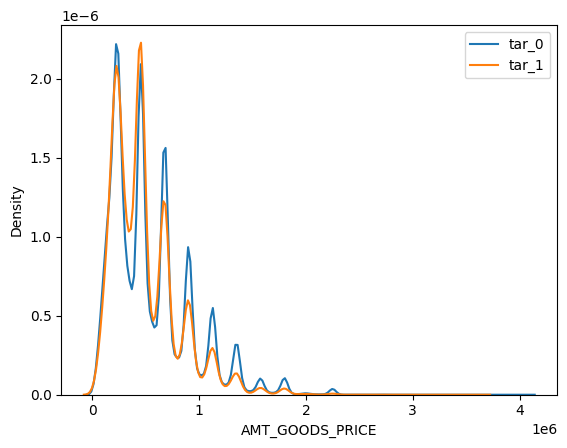

In [136]:
plt.Figure(figsize=(10,6))
sns.distplot(tar_0["AMT_GOODS_PRICE"], label='tar_0',hist=False)
sns.distplot(tar_1["AMT_GOODS_PRICE"], label='tar_1',hist=False)
plt.legend()
plt.show()

- Conclusion: The price of the goods for which loan is given has the same variable for Target 0 and 1

# Bivariate and Multivariate Analysis

### givariate Analyse between WEEKDAY_APPR_PROCESS_START vs HOUR_APPR_PROCESS_START

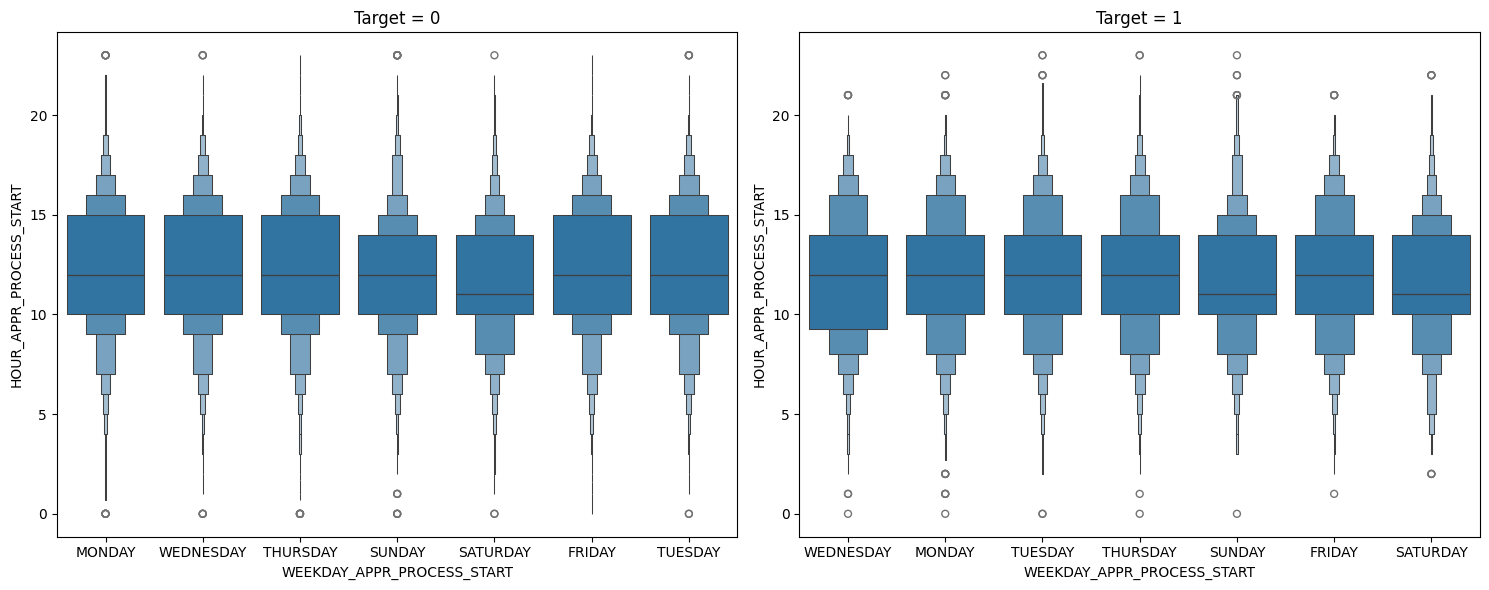

In [ ]:
plt.figure(figsize=(15, 6)) 

plt.subplot(1, 2, 1)
sns.boxenplot(x="WEEKDAY_APPR_PROCESS_START", y="HOUR_APPR_PROCESS_START", data=tar_0)
plt.title("Target = 0")
plt.xticks(rotation=45)  

plt.subplot(1, 2, 2)
sns.boxenplot(x="WEEKDAY_APPR_PROCESS_START", y="HOUR_APPR_PROCESS_START", data=tar_1)
plt.title("Target = 1")
plt.xticks(rotation=45)

plt.tight_layout()  
plt.show()

- Conclusion >>

1.The Bank operates between 10am to 3pm except for Saturday and Sunday, its between 10am to 2pm.

2.We can observe that around 11:30am to 12pm around 50% of Customers visit the branch for loan application on all the days except for Saturday where the time is between 10am to 11am for both Target 0 and 1

3.The loan defaulters have applied for the loan between 9:30am-10am and 2pm where as the applicants who repay the loan on time have applied for the loan between 10am to 3pm

### Biyariate Analyse between AGE_CATEGORY Vs AMT_CREDIT

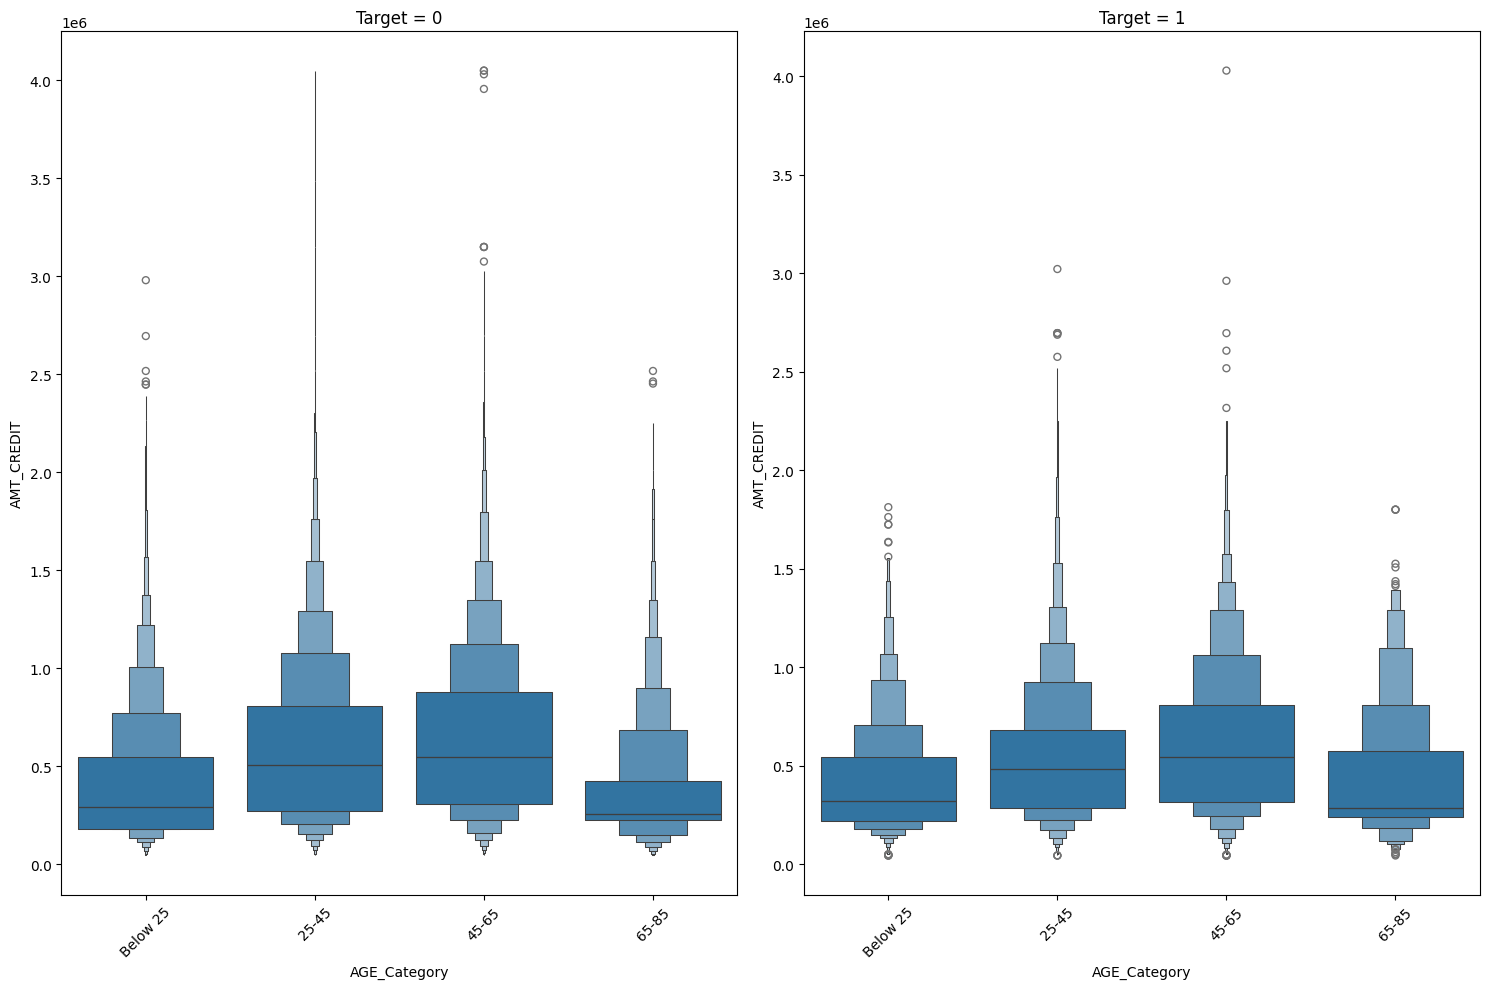

In [146]:
plt.figure(figsize=(15, 10)) 

plt.subplot(1, 2, 1)
sns.boxenplot(x="AGE_Category", y="AMT_CREDIT", data=tar_0)
plt.title("Target = 0")
plt.xticks(rotation=45)  

plt.subplot(1, 2, 2)
sns.boxenplot(x="AGE_Category", y="AMT_CREDIT", data=tar_1)
plt.title("Target = 1")
plt.xticks(rotation=45)

plt.tight_layout()  
plt.show()

- Conclusion


  1.The application between age group 25 to 65 have Credit amount of the loan less than 2500000 and are able to repay the loan properly

  2.The applicants with less than 100000 Credit amount are with age group greater than 65 may be considered as loan defaulters
  
  3.Most applicants who have Credit amount of the loan less than 1700000 are loan defaulters with 25 and less age

## Pair plot amount columns for target 0

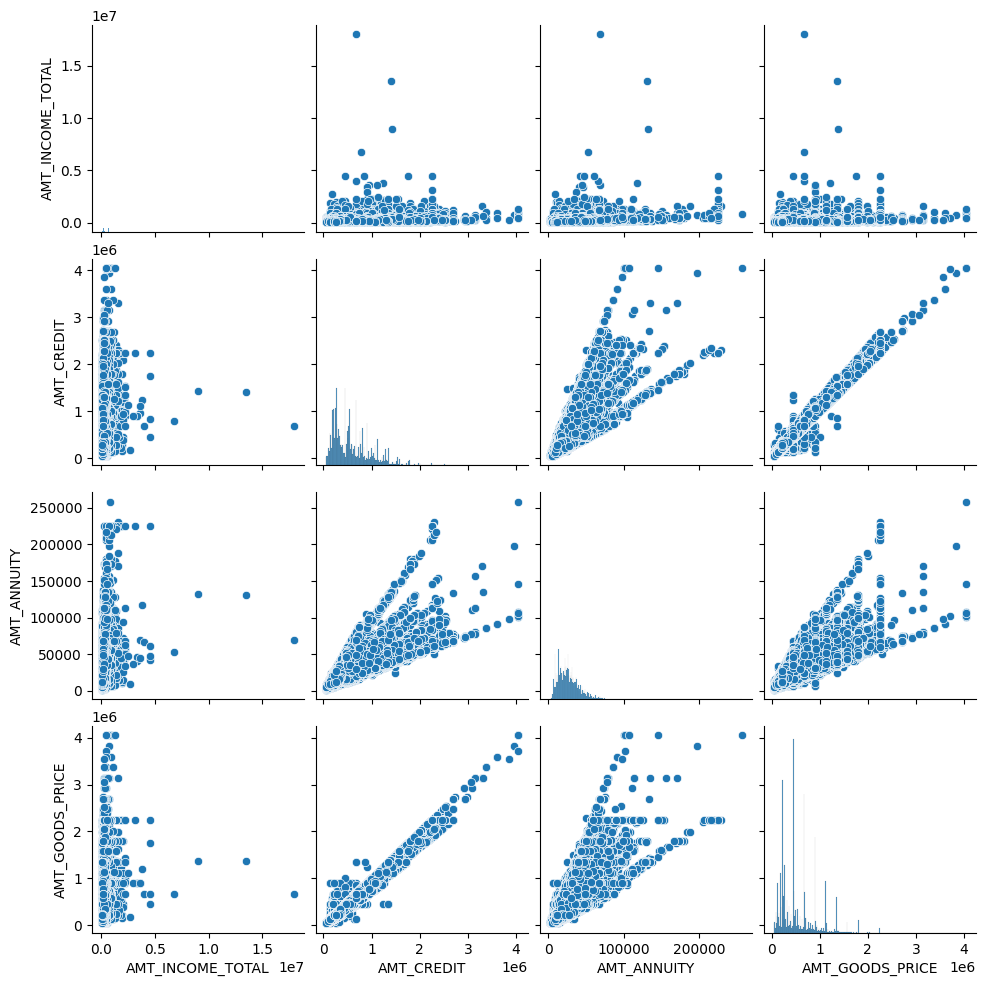

In [148]:
sns.pairplot(tar_0[["AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE"]])
plt.show()

- Conclusion >> For Applicants who are able to replay the loan on time

1.AMT_CREDIT Increases or varies linearly with AMT_GOODS_PRICE and AMT_CREDIT Increases with AMT_ANNUITY

2.AMT_ANNUITY Increases with Increases in AMT_GOODS_PRICE and AMT_Credit

3.AMT_GOODS_PRICE Increases with Increases in AMT_Credit and AMT_ANNUITY

4.AMT_INCOME_TOTAL has a drastic Increase with slight increase in AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE



## Pair Plot of Amount Columns for Target 1


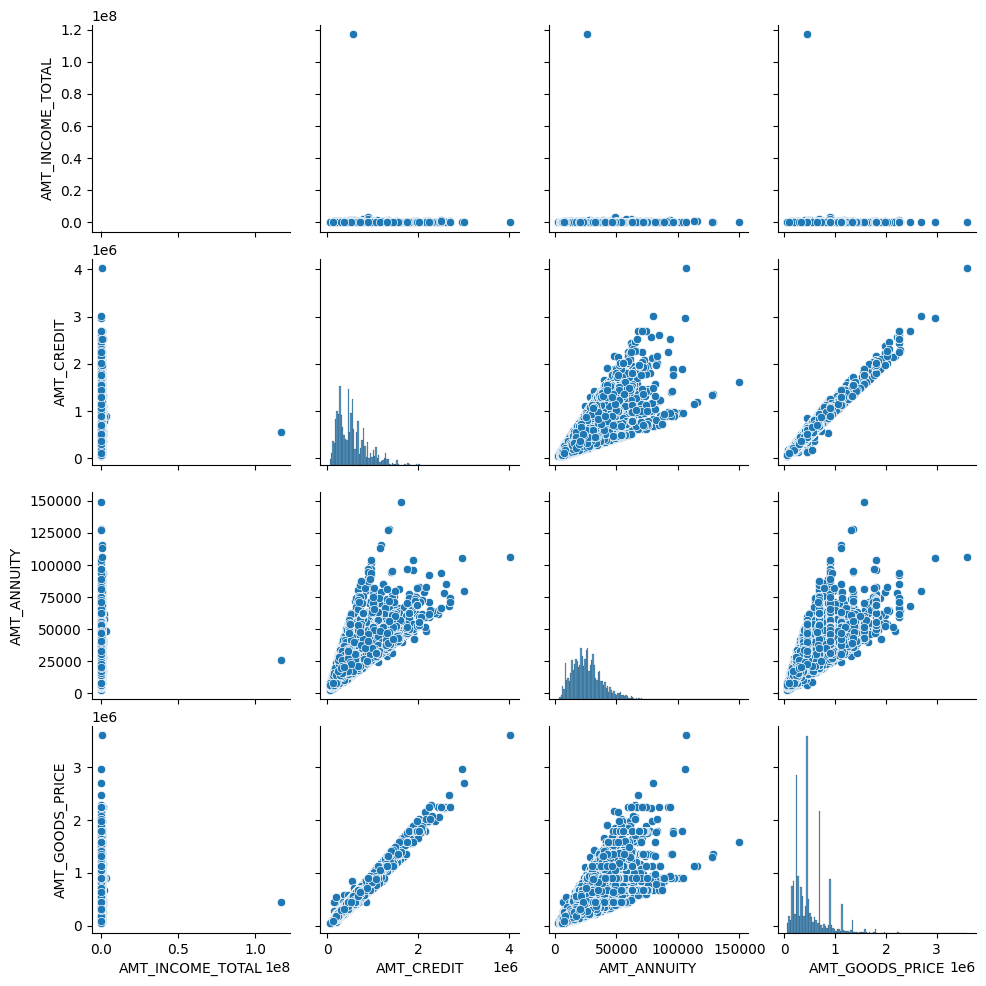

In [149]:
sns.pairplot(tar_1[["AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE"]])
plt.show()

- Conclusion >> For Applicants who are able to replay the loan on time

1.AMT_CREDIT Increases or varies linearly with AMT_GOODS_PRICE and AMT_CREDIT Increases with AMT_ANNUITY

2.AMT_ANNUITY Increases with Increases in AMT_GOODS_PRICE and AMT_Credit

3.AMT_GOODS_PRICE Increases with Increases in AMT_Credit and AMT_ANNUITY

4.AMT_INCOME_TOTAL has a drastic Increase with slight increase in AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE



## Corelation between Numerical Columns


In [159]:
corr_data = app_df[["AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE","YEARS_BIRTH","YEARS_EMPLOYED","YEARS_REGISTRATION","YEARS_ID_PUBLISH","YEARS_LAST_PHONE_CHANGE"]]
corr_data.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE
0,202500.0,406597.5,24700.5,351000.0,26,1,10,5,3
1,270000.0,1293502.5,35698.5,1129500.0,47,3,3,0,2
2,67500.0,135000.0,6750.0,135000.0,53,0,11,7,2
3,135000.0,312682.5,29686.5,297000.0,53,8,27,6,1
4,121500.0,513000.0,21865.5,513000.0,55,8,12,9,3


In [160]:
corr_data.corr()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE
AMT_INCOME_TOTAL,1.000000,0.156870,0.191657,0.159632,-0.027239,-0.063837,-0.027882,-0.008459,0.018571
AMT_CREDIT,0.156870,1.000000,0.770127,0.986734,0.055373,-0.064321,-0.009590,0.006942,0.077257
AMT_ANNUITY,0.191657,0.770127,1.000000,0.774837,-0.009519,-0.102849,-0.038487,-0.011376,0.064494
AMT_GOODS_PRICE,0.159632,0.986734,0.774837,1.000000,0.053449,-0.062193,-0.011518,0.009647,0.079349
YEARS_BIRTH,-0.027239,0.055373,-0.009519,0.053449,1.000000,0.623745,0.331856,0.272054,0.086317
YEARS_EMPLOYED,-0.063837,-0.064321,-0.102849,-0.062193,0.623745,1.000000,0.214652,0.274644,-0.016424
YEARS_REGISTRATION,-0.027882,-0.009590,-0.038487,-0.011518,0.331856,0.214652,1.000000,0.101831,0.058393
YEARS_ID_PUBLISH,-0.008459,0.006942,-0.011376,0.009647,0.272054,0.274644,0.101831,1.000000,0.092803
YEARS_LAST_PHONE_CHANGE,0.018571,0.077257,0.064494,0.079349,0.086317,-0.016424,0.058393,0.092803,1.000000


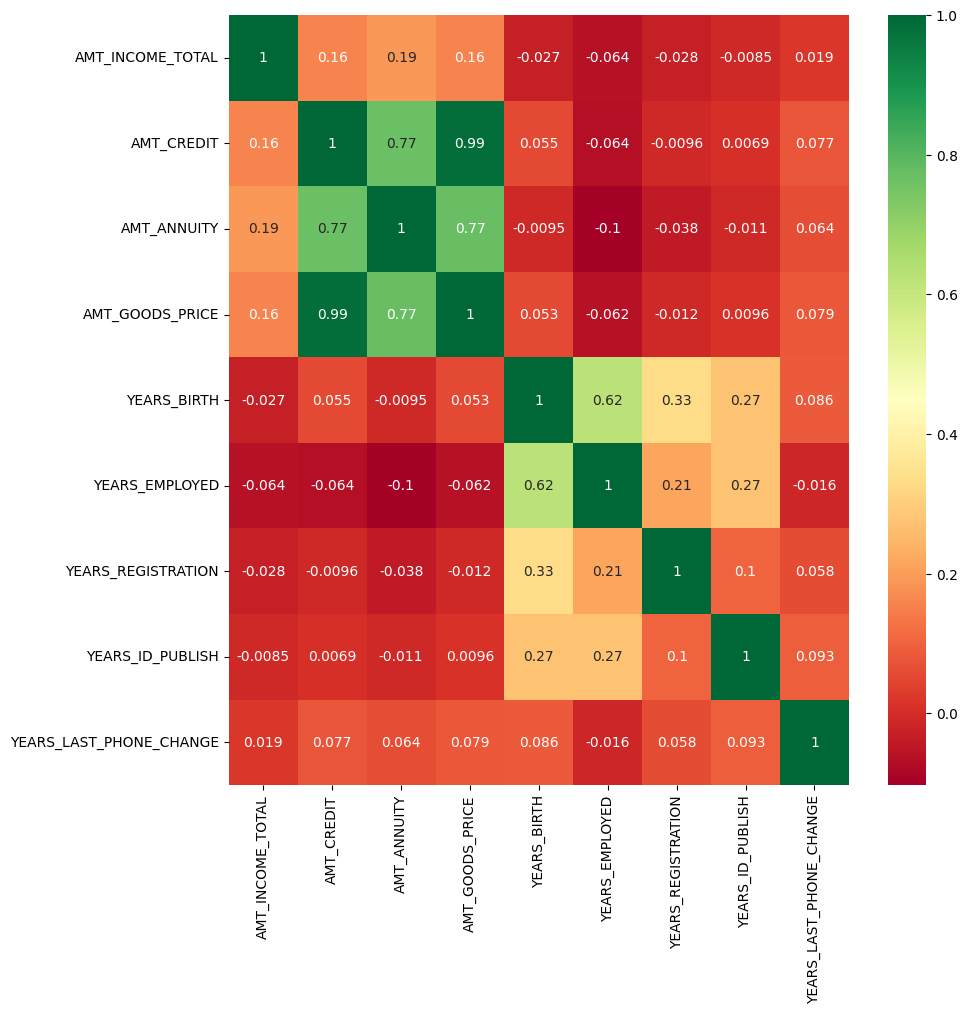

In [161]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_data.corr(),annot=True,cmap="RdYlGn")
plt.show()

- Conclusion >>

1.AMT_INCOME_TOTAL - It has a positive corelation index of 0.16.0.19,0.16 with AMT_CREDIT,AMT_ANNUITY, AMT_GOODS_PRICE respectively.

2.AMT_CREDIT - Is has negative coreltaion index of 0.064 with YEARS_EMPLOYED and positive coreltaion index of 0.99,0.77 with AMT_GOODS_PRICE, AMT_ANNUITY respectively.

3.AMT_ANNUITY - Is has negative coreltaion index of 0.1 with YEARS_EMPLOYED and positive coreltaion index of 0.77 with AMT_CREDIT

4.AMT_GOODS_PRICE - It has a positive corelation with AMT_CREDIT,AMT_ANNUITY

5.YEARS_BIRTH - It has a positive corelation with YEARS_EMPLOYED, AMT_GOODS_PRICE and negative coreltaion with AMT_ANNUITY AMT_INCOME_TOTAL

6.YEARS_EMPLOYED - Is has negative coreltaion index of 0.1 with AMT_ANNUITY and has a positive corelation with YEARS_REGISTRATION, YEARS_ID_PUBLISH

7.YEARS_REGISTRATION - It has a positive corelation with YEARS_ID_PUBLISH, YEARS_BIRTH, YEARS_EMPLOYED

YEARS_ID_PUBLISH - It has a positive corelation with YEARS_REGISTRATION and negative coreltaion with AMT_INCOME_TOTAL,AMT_ANNUITY 8.

9.YEARS_LAST_PHONE_CHANGE - It has negative coreltaion with YEARS_EMPLOYED and positive corelation with AMT_GOODS_PRICE, YEARS_ID_PUBLISH